# **ECOMMERCE CUSTOMER CHURN PREDICTION AND ANALYSIS**

By: 
1. Kenshi Poneva Y.
2. Luthfi Ghina Barka

# **1. BUSINESS PROBLEM AND DATA UNDERSTANDING**

## *1.1 Context*

Customer churn adalah metrik bisnis yang mengukur jumlah pelanggan yang telah berhenti menggunakan produk atau layanan dari suatu bisnis di perusahaan. Perpindahan atau kehilangan pelanggan adalah salah satu masalah paling krusial bagi bisnis apapun yang secara langsung menjual atau melayani pelanggan, salah satunya adalah bisnis e-commerce.

Di kasus ini kami diberikan tanggung jawab untuk menangani prediksi customer churn pada bisnis e-commerce di bidang retail.   
Jadi, pihak manajemen ingin mengetahui pelanggan mana yang cenderung memiliki persentase tinggi untuk berhenti melakukan pembelian/berpindah ke e-commerce lain. Hal ini bertujuan untuk mengurangi kerugian perusahaan yang disebabkan pada pelanggan yang hilang. 

Maka dari itu, divisi Data Science bertanggung jawab untuk mengidentifikasi peluang yang dihasilkan dari data yang tersedia. Dalam kasus ini, kita sebagai anggota tim Data Scientist ditugaskan untuk dapat memprediksi calon pelanggan mana saja yang akan churn dan diminta untuk membuat model Machine Learning yang akan digunakan oleh Tim Marketing dari e-commerce bersangkutan.

Target:  
0 = Pelanggan yang tidak churn (loyal customer)  
1 = Pelanggan yang churn (berhenti/pindah) 


## *1.2 Problem Statement*

Faktanya, persentase pelanggan yang hilang tersebut berpengaruh terhadap growth rate perusahaan, ini merupakan alasan utama yang menjadikan customer churn rate begitu penting terutama di bisnis e-commerce. 

Selain itu, sebuah survey membuktikan bahwa:
- mendapatkan pelanggan baru bisa menghabiskan biaya sekitar 5x lipat dibandingkan jika kita memelihara hubungan pelanggan yang sudah ada. 
- Tingkat keberhasilan (success rate) pada penjualan ke pelanggan yang sudah ada adalah 60-70%, sedangkan tingkat keberhasilan penjualan ke pelanggan baru adalah 5-20%. 
- Meningkatkan tingkat retensi pelanggan sebesar 5% meningkatkan keuntungan sebesar 25-95%.

Dengan alasan ini, memperhatikan dan meningkatkan hubungan dengan pelanggan yang sudah ada akan lebih hemat biaya dan lebih menghasilkan profit dibandingkan jika kita melakukan customer acquisition. 

Source: 
https://www.profitwell.com/recur/all/customer-acquisition-vs-retention  
https://www.huify.com/blog/acquisition-vs-retention-customer-lifetime-value


## *1.3 Goals*

Berdasarkan permasalahan tersebut, pihak manajemen ingin memiliki kemampuan untuk melakukan prediksi seakurat mungkin atas pelanggan yang akan churn. Ini dapat membantu mereka dalam membuat keputusan untuk mengantisipasi situasi tersebut. Maka dari itu, kita akan melakukan prediksi menggunakan machine learning dengan metode Supervised Learning (Classification).

Selain memberikan prediksi pada customer churn, pihak manajemen juga berharap bisa mengetahui faktor/variabel yang mempengaruhi seorang pelanggan yang churn atau tidak, sehingga mereka dapat membuat strategi yang baik dalam mengurangi tingkat churn yang tinggi.


## *1.4 Analytic Approach*

Jadi yang akan kita lakukan adalah menganalisa data untuk menemukan pola yang membedakan pelanggan yang akan *churn* dan yang tetap *stay* dalam menggunakan produk dan jasa yang disediakan oleh perusahaan.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi seorang pelanggan yang akan/ingin berhenti menggunakan produk/jasa pada perusahaan tersebut.

## *1.5 Metric Evaluation*


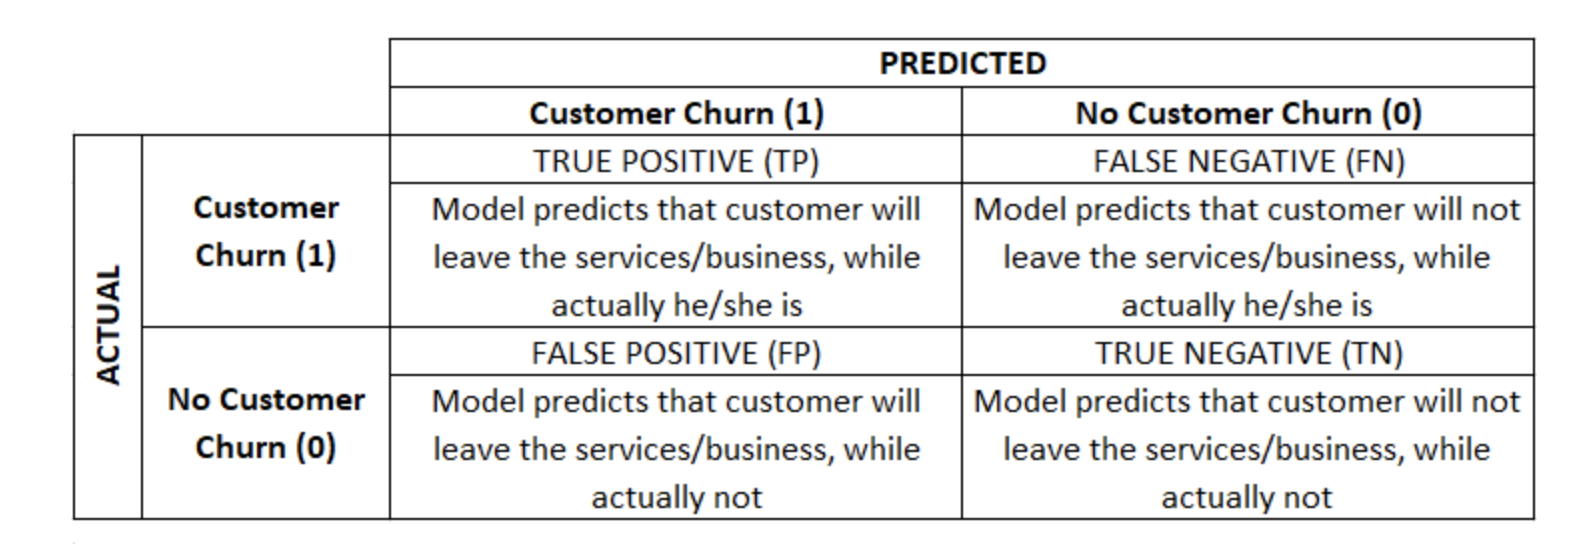

In [42]:
%matplotlib inline
from IPython.display import Image
Image('/Users/kponeva/Documents/Courses/Data Science/JC Data Science Purwadhika/Final Project/Ecommerce Churn/matrix-1.png')

> **Summary**

Type 1 error : False Positive     
Konsekuensi : sia-sianya waktu dan biaya pemasaran untuk para customer yang padahal sudah loyal

Type 2 error : False Negative     
Konsekuensi : kehilangan pelanggan yang berpotensi loyal yang berakibatkan pengurangan profit

**Metric Analysis**  

Mengacu pada *metric evaluation* diatas, kita perlu meminimalisir bagian False Negative Rate (meminimalkan profit loss) yang juga berarti memaksimalkan True Positive Rate (memaksimalkan profit perusahaan). Jadi, model yang diinginkan adalah model yang mampu mengurangi resiko kehilangan customer yang berpotensial tanpa membuang waktu dan biaya pemasaran pada customer yang sudah loyal. Jadi kita harus menyeimbangkan antara precision dan recallnya dari 1 kelas positive. Maka metric utama yang akan kita gunakan adalah **f1-score**.

## *1.6 Data Understanding*

In [320]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline 

# Model stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier , RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
# Metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
import sklearn.metrics as metrics

import shap 
from shap import initjs, force_plot

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [328]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
description = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[2,3])
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### **Data Source**

https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

### **who created the data?**

ANKIT VERMA

### **when created the data?**

Date created: 2021-01-26 
Current version: Version 1

### **About this file**
Kumpulan data milik perusahaan ECommerce online terkemuka. Sebuah perusahaan ingin mengetahui pelanggan mana yang akan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan berbagai macam promo.


In [329]:
df.shape

(5630, 20)

Berdasarkan dataset, terdapat 5630 observasi. Kolom churn juga menunjukkan apakah pelanggan akan churn atau tidak.

Kesimpulannya, variabel target adalah churn, dan semua kolom lainnya menjadi variabel fitur.

Setelah deskripsi kolom dan jumlah observasi ditetapkan, mari kita pelajari datasetnya. :)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Deskripsi Data**

Kita memiliki total dua puluh kolom dari dataset.

Deskripsi Kolom :

1.  CustomerID                  : Nomor identitas pengguna
2.  Churn                       : Identifikasi pengguna churn atau tidak.
                                    Jika bernilai 1 maka pengguna churn,
                                    Jika bernilai 0 maka pengguna tidak churn    
3.  Tenure                      : Masa pengguna berlangganan pada produk ini
4.  PreferredLoginDevice        : Perangkat yang sering digunakan untuk login
5.  CityTier                    : Klasifikasi kota berdasarkan tingkat kesejahteraan di kota tersebut
                                    1 = daerah Perkotaan
                                    2 = daerah Pedesaan
                                    3 = daerah Tertinggal
6.  WarehouseToHome             : Jarak antara gudang dan rumah pengguna
7.  PreferredPaymentMode        : Metode pembayaran yang sering digunakan untuk pengguna
8.  Gender                      : Jenis kelamin pengguna
9.  HourSpendOnApp              : Jam yang dihabiskan untuk menggunakan aplikasi atau website
10. NumberOfDeviceRegistered    : Jumlah perangkat yang diregistrasikan terhadap satu pengguna/akun
11. PreferredOrderCat           : Kategori yang sering dipesan dalam satu bulan terakhir
12. SatisfactionScore           : Nilai kepuasan pelanggan terhadap pelayanan
13. MaritalStatus               : Status pernikahan pelanggan
14. NumberOfAddress             : Jumlah alamat yang terdaftar dalam satu pengguna
15. Complain                    : Keluhan yang diajukan dalam satu bulan terakhir
16. OrderAmountHikeFromLastYear : Persentase peningkatan pesanan dalam satu tahun terakhir
17. CouponUsed                  : Jumlah kupon yang digunakan dalam satu bulan terakhir
18. OrderCount                  : Jumlah pesanan dalam satu bulan terakhir
19. DaySinceLastOrder           : Hari terakhir pemesanan yang dilakukan oleh pelanggan 
20. CashbackAmount              : Rata-rata cashback dalam satu bulan terakhir 

In [331]:
description

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


# **2. EXPLANATORY DATA ANALYSIS**

In [332]:
# drop CustomerID column

df.drop('CustomerID', axis = 1, inplace = True)

In [333]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## *2.1 Description Summary*

Dari deskripsi data diatas, didapatkan informasi bahwa dataset memiliki 15 fitur kuantitatif atau tipe data numerik dengan nilai central of tendencies (mean, median, modus) serta sebaran data (Q1,Q2,Q3,std) yang bervariasi. Kita mendapatkan informasi juga bahwa kemungkinan ditemukan outlier didalam distribusi data yang terlihat dari nilai std yang sangat besar karena mendekati nilai mean/median atau jarak data antara data max dan min yang sangat jauh.

Maka dari itu, kita akan mengecek distribusi data dari setiap fitur untuk memastikan perlakuan apa yang akan kita lakukan kepada dataset.

In [334]:
# cek distribusi data

from scipy.stats import normaltest

kolom=['Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
       'NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
Churn,tidak normal
Tenure,tidak normal
CityTier,tidak normal
WarehouseToHome,tidak normal
HourSpendOnApp,tidak normal
NumberOfDeviceRegistered,tidak normal
SatisfactionScore,tidak normal
NumberOfAddress,tidak normal
Complain,tidak normal
OrderAmountHikeFromlastYear,tidak normal


'Data kuantitatif memiliki distribusi data tidak normal, \nsehingga kita akan menggunakan ukuran data median dalam perhitungan data.'

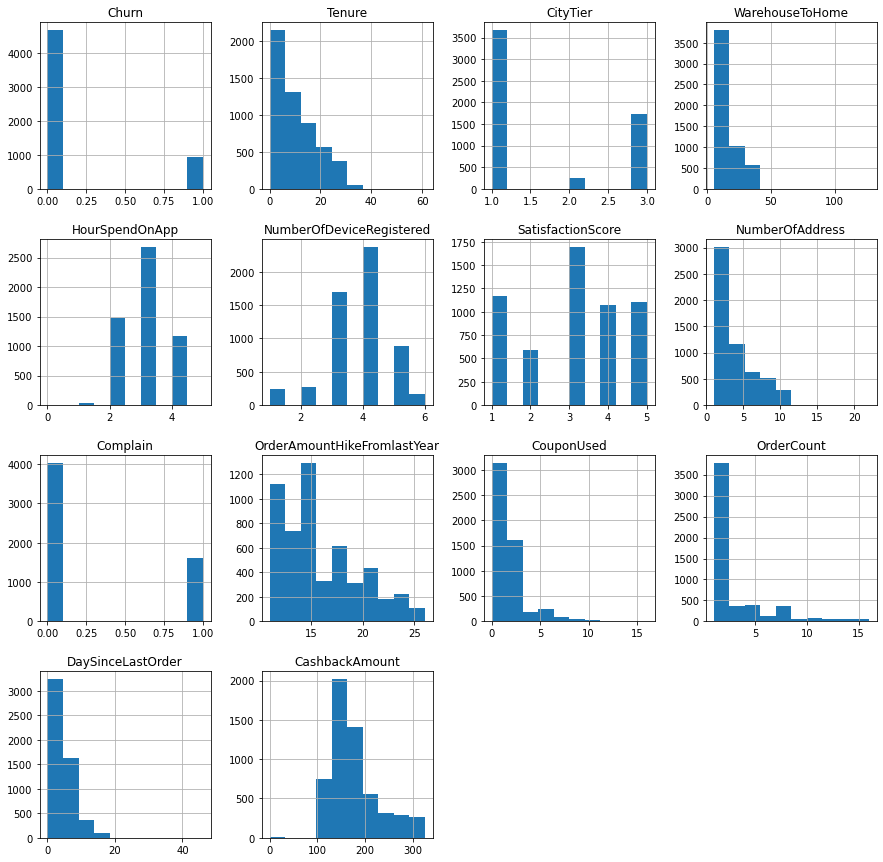

In [335]:
df.hist(bins=10,figsize=(15,15));

'''Data kuantitatif memiliki distribusi data tidak normal, 
sehingga kita akan menggunakan ukuran data median dalam perhitungan data.'''

In [336]:
df.describe(include=object)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [337]:
# check more info in each features

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, len(df), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
    df[col].nunique(), list(df[col].drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)
    
df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,Churn,int64,5630,0,0.00,2,"[0, 0]"
1,CityTier,int64,5630,0,0.00,3,"[2, 2]"
2,Complain,int64,5630,0,0.00,2,"[0, 1]"
3,NumberOfAddress,int64,5630,0,0.00,15,"[2, 11]"
4,SatisfactionScore,int64,5630,0,0.00,5,"[2, 2]"
5,NumberOfDeviceRegistered,int64,5630,0,0.00,6,"[5, 5]"
6,OrderCount,float64,5630,258,4.58,16,"[14.0, 2.0]"
7,CouponUsed,float64,5630,256,4.55,17,"[3.0, 0.0]"
8,OrderAmountHikeFromlastYear,float64,5630,265,4.71,16,"[13.0, 23.0]"
9,CashbackAmount,float64,5630,0,0.00,2586,"[148.28, 142.57]"


### *2.2 Missing Values*

Dari informasi dibawah terlihat ada beberapa kolom yang memiliki 'missing values'. Selanjutnya kita akan melakukan analisa terhadap missing values dari setiap kolomnya menggunakan function `missingno`.

In [339]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### **Matrix Plot**

Dari matrix terlihat bahwa missing values/data yang hilang pada setiap fitur memiliki pola yang cukup acak.

<AxesSubplot:>

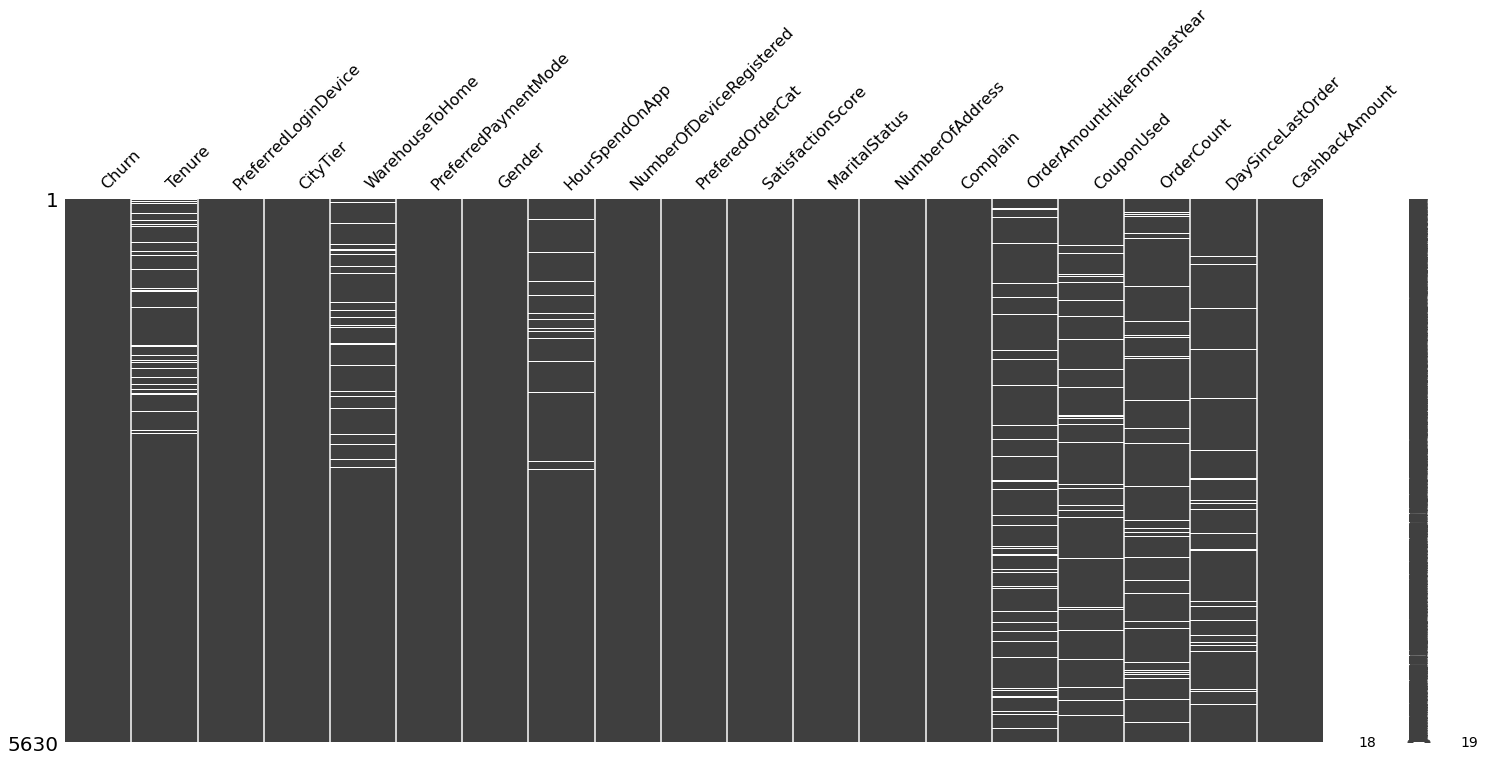

In [340]:
missingno.matrix(df)

### **Heatmap**

Hasil plot Heatmap dibawah menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita. Korelasi nulitas berkisar antara -1 hingga 1.

- -1 : Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada
- 0 : Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain
- 1 : Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

Terlihat dari Heatmap bahwa rata-rata missing values/data yang hilang antara satu fitur dengan fitur yang lainnya tidak berhubungan/berkorelasi, karena hanya memiliki nilai korelasi sebesar -0.1.

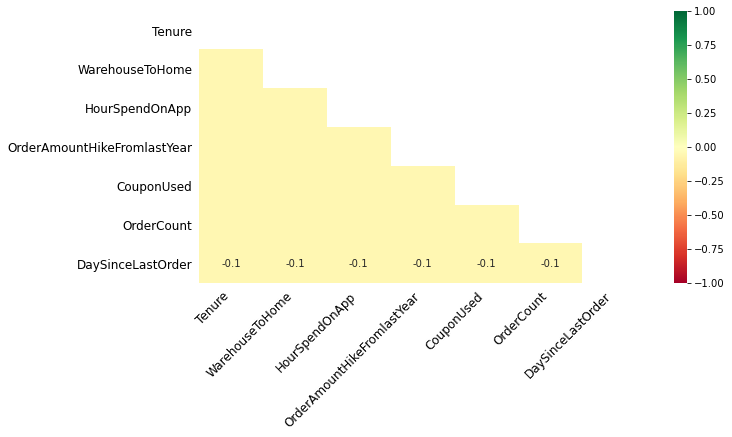

In [341]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

### **Dendogram**

Berdasarkan dendogram dibawah, terlihat bahwa fitur Churn, PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, dan CashbackAmount  berada di titik 0 karena mereka tidak mempunyai missing values/data. Sedangkan untuk fitur CouponUsed, WarehouseToHome, HourSpendOnApp, Tenure, OrderCount, OrderAmountHikeFromLastYear, dan DaySinceLastOrder memiliki missing values/data yang hilang dengan korelasi antar fitur yang tidak signifikan.

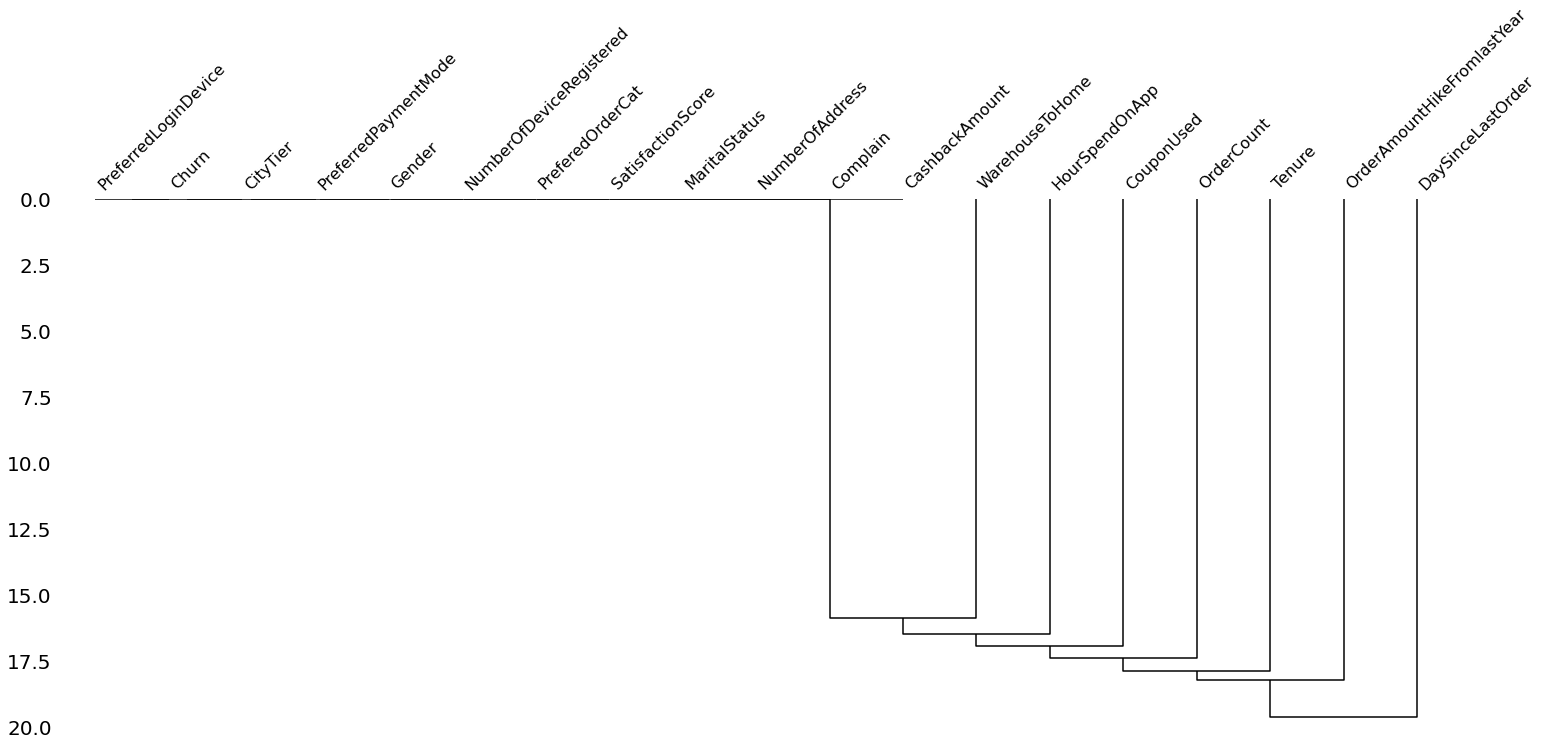

In [342]:
missingno.dendrogram(df)
plt.show()

### Handling missing values

Kita akan mengisi missing value pada fitur CouponUsed, WarehouseToHome, HourSpendOnApp, Tenure, OrderCount, OrderAmountHikeFromLastYear, dan DaySinceLastOrder menggunakan median dari masing-masing kolom, karena merupakan fitur dengan tipe numerikal yang memiliki distribusi tidak normal.

In [327]:
# #mengisi missing values

# num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# for column in num_columns:
#     df.loc[df[column].isnull(), column] = df[column].median()

# df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## *2.3 Inconsistent Data*

Terdapat beberapa fitur dengan kategori yang bermakna sama dengan kategori lain, contohnya: CC dan Credit Card pada kolom `PreferredPaymentMethod`. Oleh karena itu, kita melakukan perubahan pada masing-masing masalah yang sama. 

In [343]:
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 Churn [1 0]
 Tenure [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
 PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
 CityTier [3 1 2]
 WarehouseToHome [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
 PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 Gender ['Female' 'Male']
 HourSpendOnApp [ 3.  2. nan  1.  0.  4.  5.]
 NumberOfDeviceRegistered [3 4 5 2 1 6]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
 SatisfactionScore [2 3 5 4 1]
 MaritalStatus ['Single' 'Divorced' 'Married']
 NumberOfAddress [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
 Complain [1 0]
 OrderAmountHikeFromlastYear [11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25.

In [344]:
#Mengubah PreferredPaymentMode dri CreditCard jadi CC
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Credit Card':'CC'})

#Mengubah PreferredPaymentMode dri Cash On Delivery jadi COD
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})

#Mengubah PreferedOrderCat Device dri Phone jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

#Mengubah Login Device dri Phone jadi Mobile Phone
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

In [346]:
# printing unique values of each columns
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

Churn: 
[1 0]

Tenure: 
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]

PreferredLoginDevice: 
['Mobile Phone' 'Computer']

CityTier: 
[3 1 2]

WarehouseToHome: 
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode: 
['Debit Card' 'UPI' 'CC' 'COD' 'E wallet']

Gender: 
['Female' 'Male']

HourSpendOnApp: 
[ 3.  2. nan  1.  0.  4.  5.]

NumberOfDeviceRegistered: 
[3 4 5 2 1 6]

PreferedOrderCat: 
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore: 
[2 3 5 4 1]

MaritalStatus: 
['Single' 'Divorced' 'Married']

NumberOfAddress: 
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain: 
[1 0]

OrderAmountHikeFromlastYear: 
[11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]

CouponUsed: 
[

## *2.3 Data Analysis*

In [349]:
#pembagian fitur berdasarkan tipe data

num = df.select_dtypes(include=["number"]).columns

cat = df.select_dtypes(include=["object"]).columns

print("Numerical Features:\n", num)
print("\n")
print("Categorical Features:\n", cat)

Numerical Features:
 Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


Categorical Features:
 Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


### Proporsi Customer Churn

Dari hasil grafik dibawah terlihat bahwa 16.84% dari total pelanggan telah melakukan churn. Kondisi pelanggan melakukan tindakan churn pastinya disebabkan oleh beberapa faktor. Selanjutnya kita akan melakukan analisa faktor apa saja yang mempengaruhi para pelanggan dalam melakukan tindakan churn melalui hubungan setiap fitur data terhadap target 'Churn'.

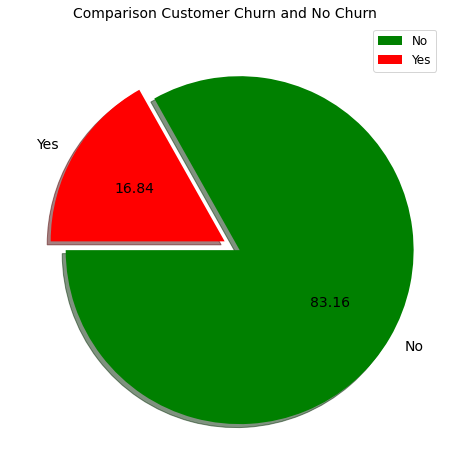

In [350]:
plt.figure(figsize=(10,8))
plt.pie(df["Churn"].value_counts(),autopct='%.2f',explode=[0.1,0],
        labels=["No","Yes"],shadow=True,textprops={'fontsize': 14},
       colors=["green","red"],startangle=180)
plt.title("Comparison Customer Churn and No Churn",fontsize=14)
plt.legend(fontsize=12,loc="upper right")
plt.show()

#### Fitur 'Tenure'

Fitur 'Tenure' menandakan informasi tentang sudah berapa lama para customer tersebut bergabung dalam layanan e-commerce ini. Berdasarkan analisis data visualisasi dibawah, para customer yang baru mulai bergabung atau memiliki periode waktu bergabung yang kurang dari 2 bulan cenderung melakukan *churn* atau berhenti melakukan transaksi di e-commerce ini. Hal ini bisa diakibatkan oleh beberapa kemungkinan antara lain pelanggan baru tersebut hanya mencoba fitur-fitur yang ada pada pelayanan e-commerce tsb atau pelanggan tersebut berhenti setelah mencoba fitur di e-commerce lain yang dirasa lebih menguntungkannya. 

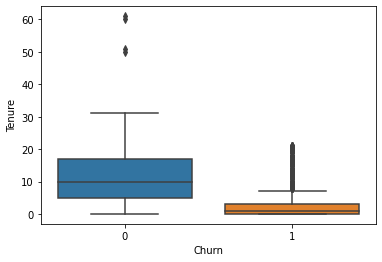

In [351]:
sns.boxplot(x='Churn', y='Tenure', data=df);

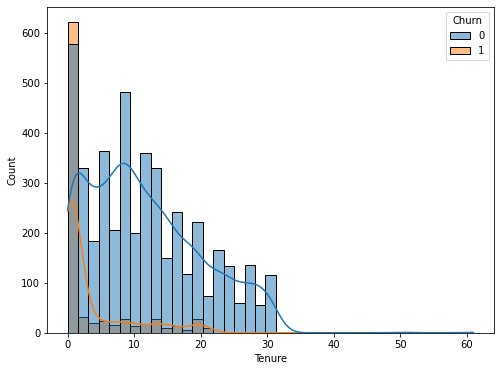

In [352]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Tenure',hue='Churn',kde=True)
plt.show()

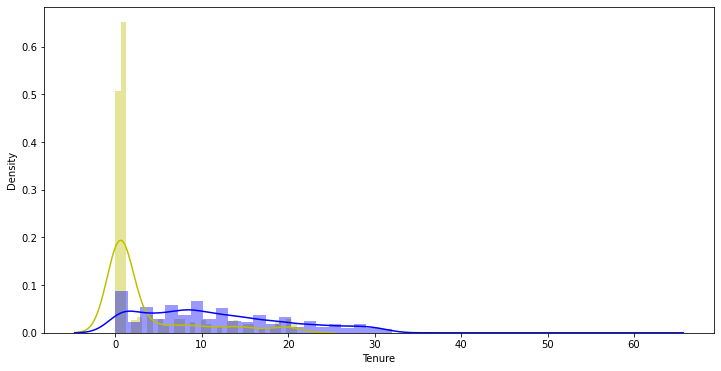

In [353]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['Tenure'],color='y')
sns.distplot(df[df['Churn']==0]['Tenure'],color='b')

plt.show();

In [354]:
Churn_Based_Tenure = df.groupby('Tenure')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_Tenure

Churn,0,1
Tenure,,
0.0,0.464567,0.535433
1.0,0.494203,0.505797
2.0,0.916168,0.083832
3.0,0.907692,0.092308
4.0,0.901478,0.098522
5.0,0.921569,0.078431
6.0,0.956284,0.043716
7.0,0.927602,0.072398
8.0,0.939163,0.060837


#### Fitur 'WarehouseToHome'

Fitur 'WarehouseToHome' merupakan fitur yang berisi informasi jarak lokasi customer terhadap lokasi gudang pengiriman. Berdasarkan analisis data visualisasi dibawah, para customer yang berlokasi semakin jauh dari lokasi pengiriman barang cenderung memiliki tingkat *churn* yang lebih tinggi. Hal ini dapat disebabkan karena biaya pengiriman barang yang semakin lebih tinggi jika lokasi customer lebih jauh.

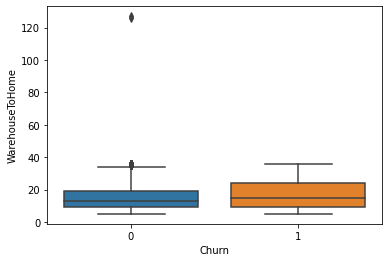

In [355]:
sns.boxplot(x='Churn', y='WarehouseToHome', data=df);

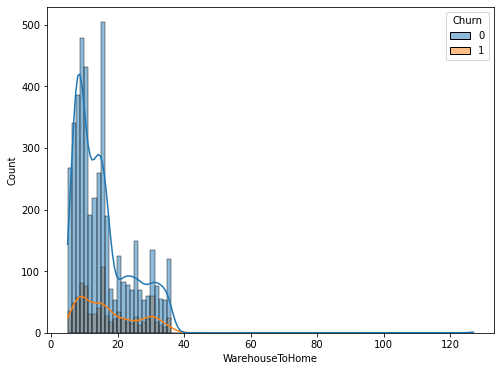

In [356]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='WarehouseToHome',hue='Churn',kde=True)
plt.show()

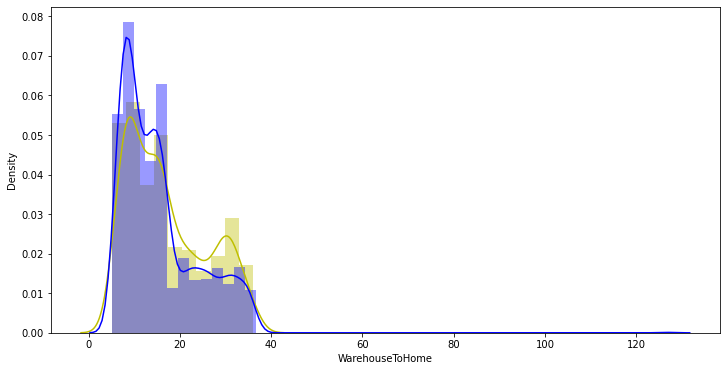

In [357]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['WarehouseToHome'],color='y')
sns.distplot(df[df['Churn']==0]['WarehouseToHome'],color='b')

plt.show();

In [358]:
CityTier_Based_WarehouseToHome = df.groupby('WarehouseToHome')['Churn'].value_counts(normalize=True).unstack()
CityTier_Based_WarehouseToHome

Churn,0,1
WarehouseToHome,,
5.0,0.875000,0.125000
6.0,0.884746,0.115254
7.0,0.874036,0.125964
8.0,0.869369,0.130631
9.0,0.856887,0.143113
10.0,0.839416,0.160584
11.0,0.862661,0.137339
12.0,0.864253,0.135747
13.0,0.879518,0.120482


#### Fitur 'HourSpendOnApp'

Fitur 'HouSpendOnApp' merupakan fitur yang berisi informasi tentang rata-rata waktu yang dihabiskan oleh para customer dalam menggunakan aplikasi e-commerce per hari nya. Berdasarkan analisis data dibawah, kebanyakan cutomer menghabiskan rata-rata 3 jam dalam sehari untuk penggunaan aplikasi e-commerce ini.  

<AxesSubplot:xlabel='Churn', ylabel='HourSpendOnApp'>

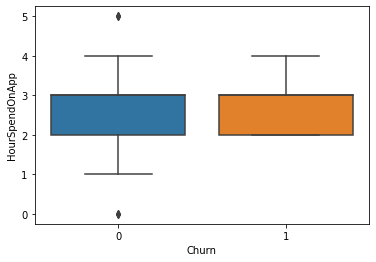

In [359]:
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df)

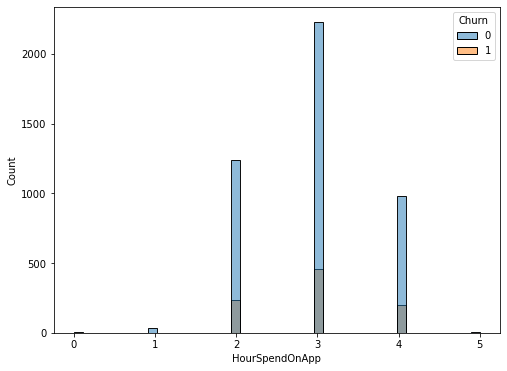

In [362]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='HourSpendOnApp',hue='Churn')
plt.show();

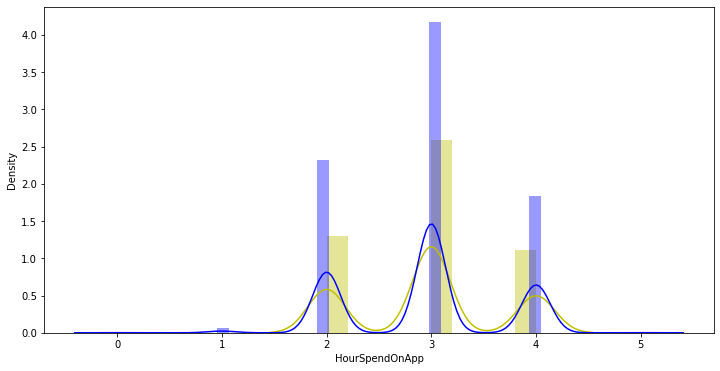

In [363]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['HourSpendOnApp'],color='y')
sns.distplot(df[df['Churn']==0]['HourSpendOnApp'],color='b')

plt.show();

In [364]:
Churn_Based_HourSpendOnApp = df.groupby('HourSpendOnApp')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_HourSpendOnApp

Churn,0,1
HourSpendOnApp,,
0.0,1.000000,NaN
1.0,1.000000,NaN
2.0,0.842284,0.157716
3.0,0.828805,0.171195
4.0,0.831633,0.168367
5.0,1.000000,NaN


#### Fitur 'NumberOfDeviceRegistered'

Fitur 'NumberOfDeviceRegistered' berisikan informasi tentang jumlah *device* yang didaftarkan oleh pelanggan ke aplikasi e-commerce. Dari hasil analisis data dibawah, semakin banyak device yang didaftarkan oleh masing-masing pelanggan maka kecenderungan pelanggan tersebut untuk *churn* dari e-commerce ini akan semakin tinggi. Hal ini dapat diakibatkan karena para pelanggan tersebut hanya ingin menikmati promo awal yang biasanya disediakan oleh e-commerce kepada para pelanggan baru.

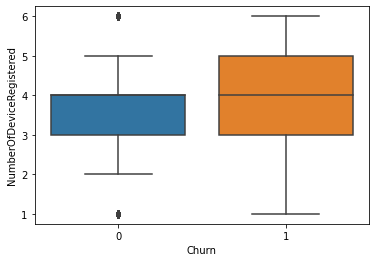

In [365]:
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df);

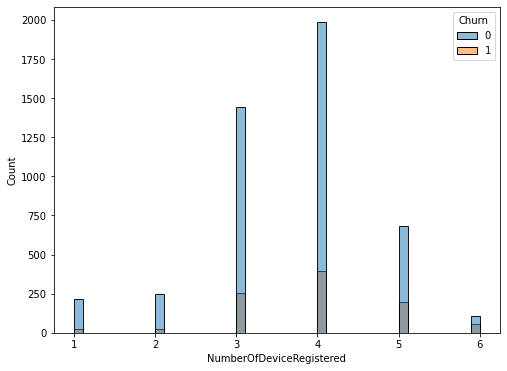

In [368]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='NumberOfDeviceRegistered',hue='Churn')
plt.show();

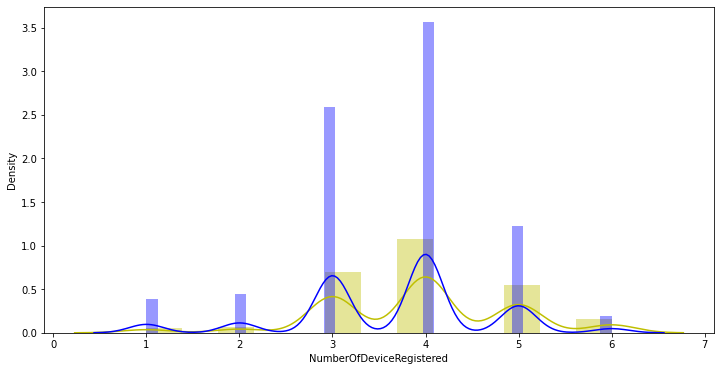

In [369]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['NumberOfDeviceRegistered'],color='y')
sns.distplot(df[df['Churn']==0]['NumberOfDeviceRegistered'],color='b')

plt.show();

In [370]:
Churn_Based_NumberOfDeviceRegistered = df.groupby('NumberOfDeviceRegistered')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_NumberOfDeviceRegistered

Churn,0,1
NumberOfDeviceRegistered,,
1,0.906383,0.093617
2,0.905797,0.094203
3,0.850500,0.149500
4,0.835086,0.164914
5,0.775255,0.224745
6,0.654321,0.345679


#### Fitur 'NumberOfAddress'

Fitur 'NumberOfAddress' merupakan fitur yang berisi tentang jumlah alamat yang didaftarkan oleh para pelanggan ke aplikasi e-commerce. Dari data fitur tersebut terlihat bahwa para pelanggan memiliki lebih dari 1 alamat yang didaftarkan. Selain itu, semakin banyak jumlah alamat yang  didaftarkan para pelanggan ke aplikasi e-commerce, kecenderungan para pelanggan untuk *churn* juga semakin meningkat. 

<AxesSubplot:xlabel='Churn', ylabel='NumberOfAddress'>

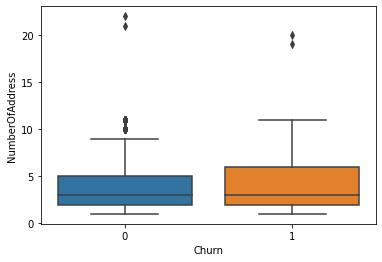

In [371]:
sns.boxplot(x='Churn', y='NumberOfAddress', data=df)

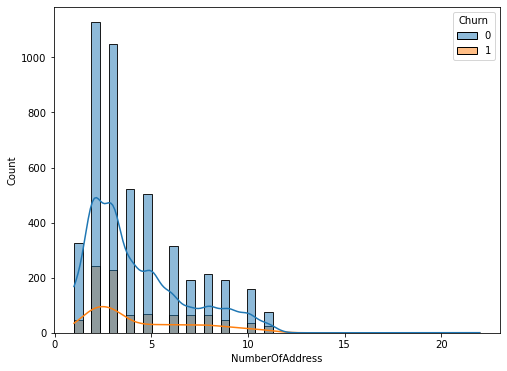

In [372]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='NumberOfAddress',hue='Churn',kde=True)
plt.show();

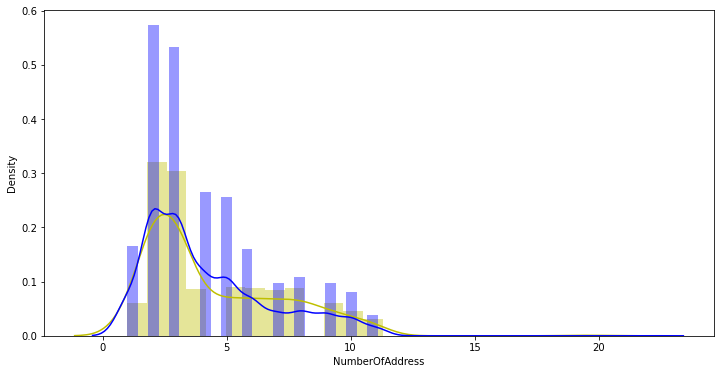

In [373]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['NumberOfAddress'],color='y')
sns.distplot(df[df['Churn']==0]['NumberOfAddress'],color='b')

plt.show();

In [374]:
Churn_Based_NumberOfAddress = df.groupby('NumberOfAddress')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_NumberOfAddress

Churn,0,1
NumberOfAddress,,
1,0.878706,0.121294
2,0.823959,0.176041
3,0.821596,0.178404
4,0.889456,0.110544
5,0.882662,0.117338
6,0.827225,0.172775
7,0.750000,0.250000
8,0.764286,0.235714
9,0.807531,0.192469


#### Fitur 'OrderAmountHikeFromlastYear'

Fitur 'OrderAmountHikeFromlastYear' merupakan fitur yang berisi persentase kenaikan jumlah pemesanan oleh para customer terhitung dari tahun lalu. Dan berdasarkan data dibawah, persentase kenaikan jumlah pemesenan tertinggi dari tahun lalu berada di angka 15%.   

<AxesSubplot:xlabel='Churn', ylabel='OrderAmountHikeFromlastYear'>

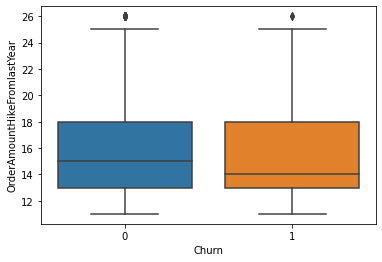

In [375]:
sns.boxplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df)

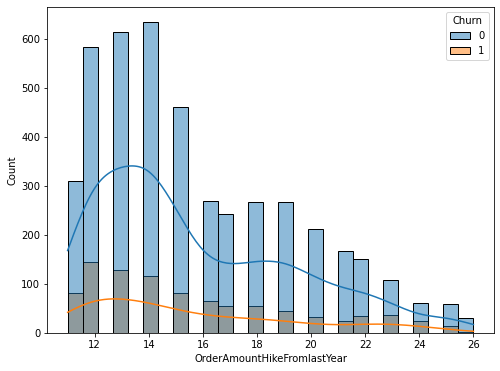

In [376]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='OrderAmountHikeFromlastYear',hue='Churn',kde=True)
plt.show();

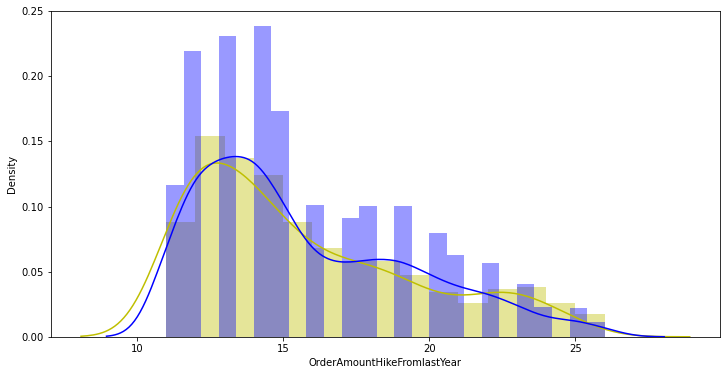

In [377]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['OrderAmountHikeFromlastYear'],color='y')
sns.distplot(df[df['Churn']==0]['OrderAmountHikeFromlastYear'],color='b')

plt.show();

In [378]:
Churn_Based_OrderAmountHikeFromlastYear = df.groupby('OrderAmountHikeFromlastYear')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_OrderAmountHikeFromlastYear

Churn,0,1
OrderAmountHikeFromlastYear,,
11.0,0.790281,0.209719
12.0,0.802198,0.197802
13.0,0.827260,0.172740
14.0,0.845333,0.154667
15.0,0.848708,0.151292
16.0,0.807808,0.192192
17.0,0.818182,0.181818
18.0,0.831776,0.168224
19.0,0.858521,0.141479


#### Fitur 'CouponUsed'

Fitur 'CouponUsed' berisikan data jumlah kupon yang digunakan oleh para pelanggan pada bulan lalu. Berdasarkan hasil analisis data dibawah terlihat bahwa rata-rata para pelanggan menggunakan kupon pada bulan lalu sebanyak satu kali.

<AxesSubplot:xlabel='Churn', ylabel='CouponUsed'>

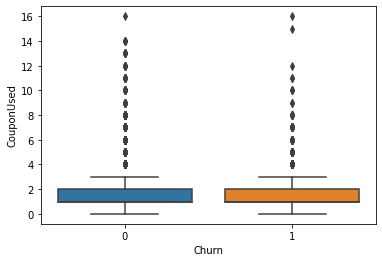

In [379]:
sns.boxplot(x='Churn', y='CouponUsed', data=df)

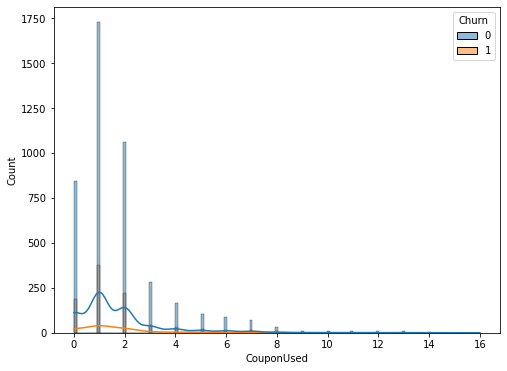

In [380]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='CouponUsed',hue='Churn',kde=True)
plt.show();

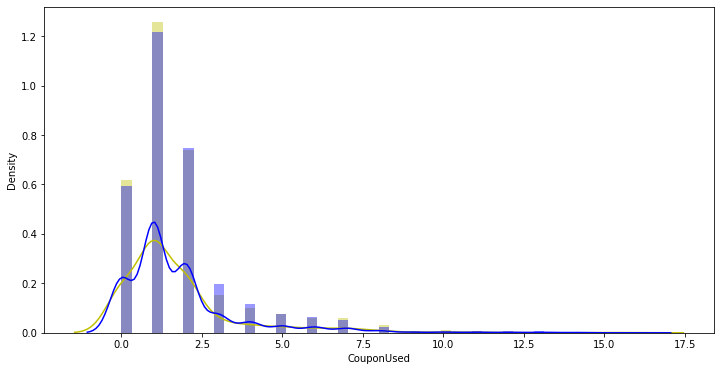

In [381]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['CouponUsed'],color='y')
sns.distplot(df[df['Churn']==0]['CouponUsed'],color='b')

plt.show();

In [382]:
Churn_Based_CouponUsed = df.groupby('CouponUsed')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_CouponUsed

Churn,0,1
CouponUsed,,
0.0,0.819417,0.180583
1.0,0.820428,0.179572
2.0,0.826968,0.173032
3.0,0.859327,0.140673
4.0,0.847716,0.152284
5.0,0.821705,0.178295
6.0,0.833333,0.166667
7.0,0.797753,0.202247
8.0,0.785714,0.214286


#### Fitur 'OrderCount'

Fitur 'OrderCount' berisikan data jumlah pemesanan oleh para pelanggan di aplikasi e-commerce pada bulan lalu. Terlihat bahwa rata-rata jumlah pembelanjaan yang dilakukan oleh para pelanggan pada bulan lalu sebanyak 2 kali. 

<AxesSubplot:xlabel='Churn', ylabel='OrderCount'>

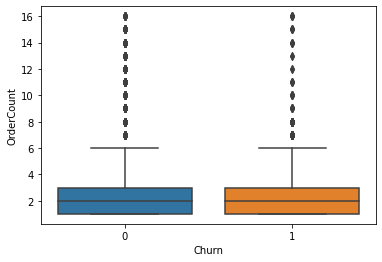

In [383]:
sns.boxplot(x='Churn', y='OrderCount', data=df)

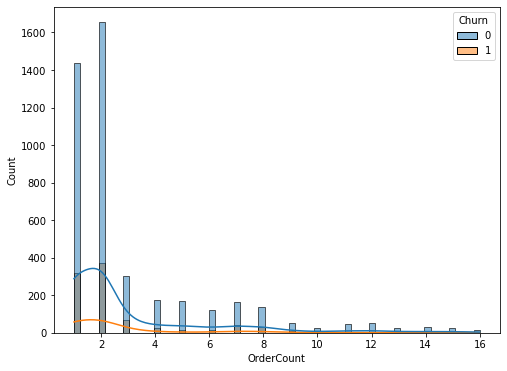

In [384]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='OrderCount',hue='Churn',kde=True)
plt.show();

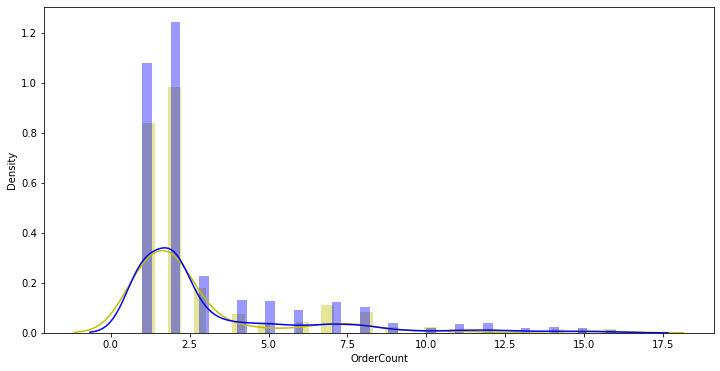

In [385]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['OrderCount'],color='y')
sns.distplot(df[df['Churn']==0]['OrderCount'],color='b')

plt.show();

In [386]:
Churn_Based_OrderCount = df.groupby('OrderCount')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_OrderCount

Churn,0,1
OrderCount,,
1.0,0.819532,0.180468
2.0,0.817284,0.182716
3.0,0.816712,0.183288
4.0,0.862745,0.137255
5.0,0.922652,0.077348
6.0,0.883212,0.116788
7.0,0.796117,0.203883
8.0,0.813953,0.186047
9.0,0.870968,0.129032


#### Fitur 'DaySinceLastOrder'

Fitur 'DaySinceLastOrder' merupakan fitur yang berisikan tentang informasi berapa hari sejak pemesanan terkahir yang dilakukan oleh para customer. Dari hasil analisis data dibawah terlihat bahwa baru sekiar 0-3 hari sejak pemesanan terakhir, banyak customer yang melakukan *churn*. Hal ini bisa diasumsikan bahwa para pelanggan merasa tidak puas dengan pemesanan terakhirnya.

<AxesSubplot:xlabel='Churn', ylabel='DaySinceLastOrder'>

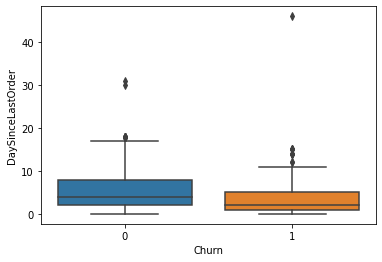

In [387]:
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)

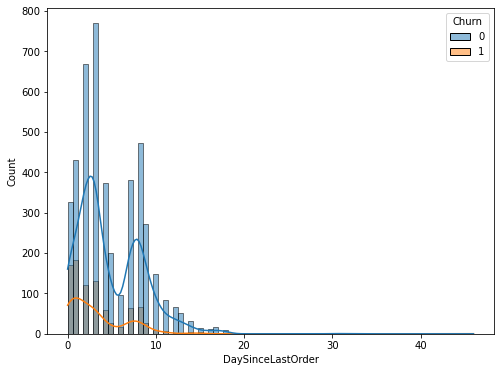

In [388]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='DaySinceLastOrder',hue='Churn',kde=True)
plt.show();

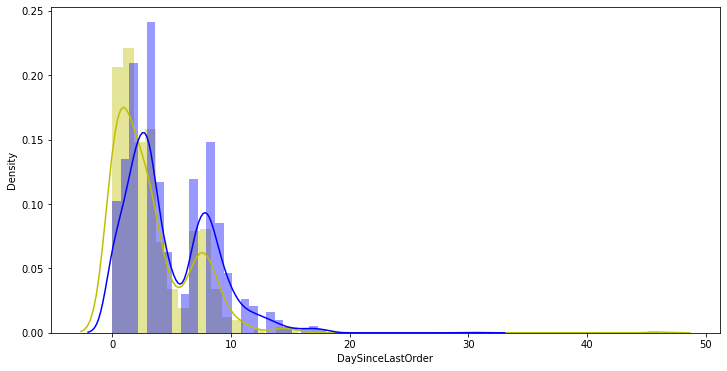

In [389]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['DaySinceLastOrder'],color='y')
sns.distplot(df[df['Churn']==0]['DaySinceLastOrder'],color='b')

plt.show();

In [390]:
Churn_Based_DaySinceLastOrder = df.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_DaySinceLastOrder

Churn,0,1
DaySinceLastOrder,,
0.0,0.657258,0.342742
1.0,0.703583,0.296417
2.0,0.845960,0.154040
3.0,0.855556,0.144444
4.0,0.865429,0.134571
5.0,0.877193,0.122807
6.0,0.858407,0.141593
7.0,0.854586,0.145414
8.0,0.877323,0.122677


#### Fitur 'CashbackAmount'

Fitur 'CashbackAmount' merupakan fitur yang berisikan tentang jumlah *cashback* yang didapatkan oleh para customer pada bulan lalu. Dari hasil grafik dibawah terlihat bahwa semakin sedikit *cashback* yang didapatkan oleh para pelanggan, maka pelanggan-pelanggan tersebut cenderung melakukan tindakan *churn*.

<AxesSubplot:xlabel='Churn', ylabel='CashbackAmount'>

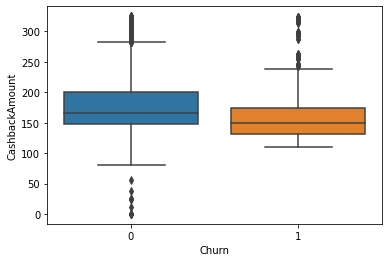

In [391]:
sns.boxplot(x='Churn', y='CashbackAmount', data=df)

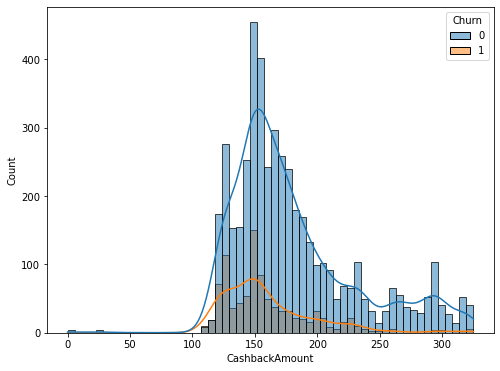

In [392]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='CashbackAmount',hue='Churn',kde=True)
plt.show();

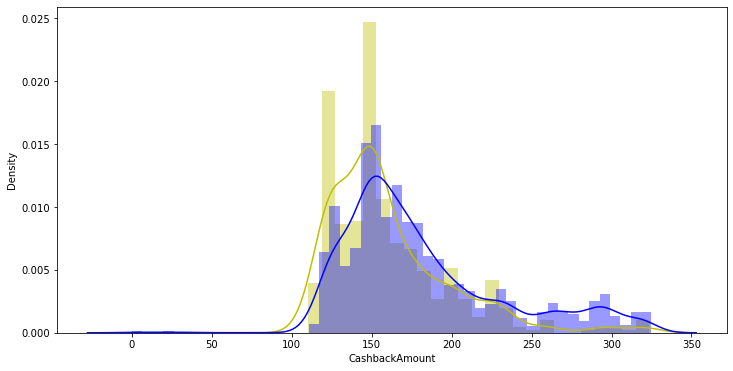

In [393]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Churn']==1]['CashbackAmount'],color='y')
sns.distplot(df[df['Churn']==0]['CashbackAmount'],color='b')

plt.show();

#### Fitur 'CityTier'

Fitur 'CityTier' ini berisi informasi persebaran customer berdasarkan tingkat kemajuan kota dari masing-masing lokasi tempat tinggal customer. Tier 1 menandakan kota yang paling maju dengan tingkat pereknomian yang tinggi, sedangkan Tier 2 menandakan kota yang masih berkembang dengan tingkat perekonomian yangs sedang, dan Tier 3 merupakan kota berkembang dengan tingkat perekonomian yang paling rendah.

Berdasarkan analisis data visualisasi dibawah, para customer yang berlokasi di kota Tier 2 dan 3 atau kota yang masih berkembang memiliki tingkat churn yang lebih tinggi dibandingkan pada kota Tier 1. Hal ini dikarenakan kota Tier 1 lebih maju dibandingkan tingkat kota yang lain sehingga perekonomiannya lebih stabil. Sedangkan pada kota yang masih berkembang dengan tingkat ekonomi penduduk yang lebih rendah bisa jadi kendala para customer dalam berlangganan layanan pada e-commerce ini. Selain itu infrastruktur pelayanan e-commerce kemungkinan besar juga belum maksimal dalam menjangkau kondisi di wilayah Tier 2 dan Tier 3. Sehingga kita perlu meningkatkan penjangkauan pelayanan di wilayah Tier 2 dan Tier 3 guna meningkatkan profit dari para pelanggan di wilayah tersebut.

In [394]:
def countplot(label, dataset):
    Y = df[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=df, hue="Churn")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

In [395]:
round(df['CityTier'].value_counts()*100/df['CityTier'].value_counts().sum(),3)

1    65.115
3    30.586
2     4.298
Name: CityTier, dtype: float64

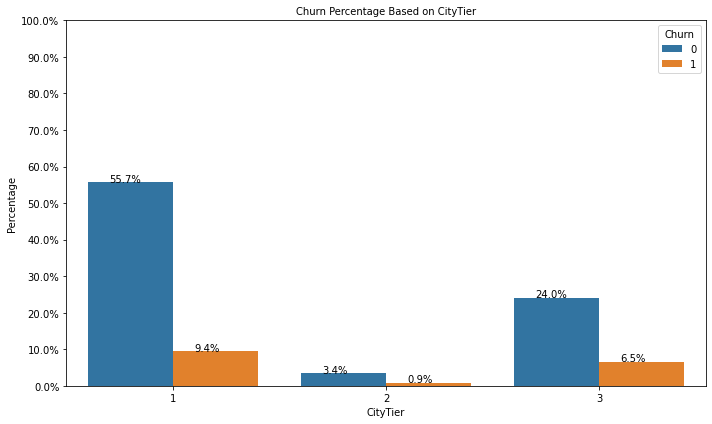

In [396]:
plt.figure(figsize=(10,6))
countplot('CityTier',df)
plt.title('Churn Percentage Based on CityTier',size=10)
plt.xlabel('CityTier',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show();

In [397]:
df.groupby('CityTier')['Churn'].value_counts(normalize=True).unstack()

Churn,0,1
CityTier,,
1,0.854883,0.145117
2,0.801653,0.198347
3,0.786295,0.213705


#### Fitur 'SatisfactionScore'

Fitur 'SatisfactionScore' merupakan fitur yang berisi tentang skor kepuasan yang diberikan oleh para pelanggan terhadap aplikasi e-commerce yang telah mereka gunakan. Berdasarkan hasil analisis data dibawah, skor kepuasan yang paling banyak diberikan oleh para pelanggan adalah skor 3, disusul dengan skor 1, 5, 4, dan terakhir 2. Hal ini menunjukkan bahwa para pelanggan masih belum cukup puas dengan pelayanan yang diberikan oleh pihak e-commerce. Sehingga beberapa diantara pelanggan tersebut melakukan pemberhentian layanan atau churn. Namun, pelanggan yang memberi skor terbaik yaitu 5 cenderung melakukan tindakan *churn*.

In [398]:
round(df['SatisfactionScore'].value_counts()*100/df['SatisfactionScore'].value_counts().sum(),3)

3    30.160
1    20.675
5    19.680
4    19.076
2    10.409
Name: SatisfactionScore, dtype: float64

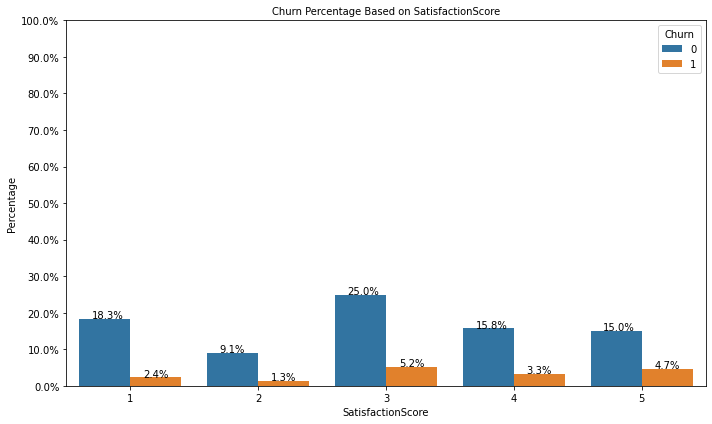

In [399]:
plt.figure(figsize=(10,6))
countplot('SatisfactionScore',df)
plt.title('Churn Percentage Based on SatisfactionScore',size=10)
plt.xlabel('SatisfactionScore',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show();

In [400]:
df.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack()

Churn,0,1
SatisfactionScore,,
1,0.884880,0.115120
2,0.873720,0.126280
3,0.828033,0.171967
4,0.828678,0.171322
5,0.761733,0.238267


#### Fitur 'Complain'

Fitur 'Complain' berisikan informasi tentang jumlah komplain yang diberikan oleh para pelanggan ke aplikasi e-commerce. Sebanyak 28.49% pelanggan telah melakukan komplain terhadap pelayanan e-commerce dan 31.67% dari pelanggan yang melakukan complain tersebut telah melakukan tindakan *churn*.

In [401]:
round(df['Complain'].value_counts()*100/df['Complain'].value_counts().sum(),3)

0    71.51
1    28.49
Name: Complain, dtype: float64

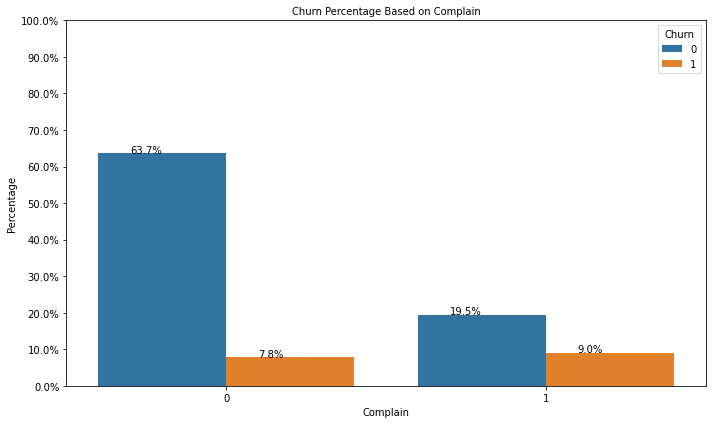

In [402]:
plt.figure(figsize=(10,6))
countplot('Complain',df)
plt.title('Churn Percentage Based on Complain',size=10)
plt.xlabel('Complain',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

In [403]:
df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack()

Churn,0,1
Complain,,
0,0.890710,0.109290
1,0.683292,0.316708


#### Fitur 'PreferredLoginDevice'

Fitur 'PreferredLoginDevice' merupakan fitur yang berisi informasi tentang jenis device yang digunakan oleh para pelanggan untuk login ke aplikasi e-commerce. Berdasarkan hasil uji chi square test dibawah, fitur 'PreferredLoginDevice' ini memiliki korelasi terhadap churn. Mayoritas pelanggan melakukan login ke aplikasi e-commerce melalui perangkat mobile phone. Namun, perangkat computer memiliki porsi terbanyak untuk pelanggan melakukan tindakan *churn*.

In [404]:
round(df['PreferredPaymentMode'].value_counts()*100/df['PreferredPaymentMode'].value_counts().sum(),3)

Debit Card    41.101
CC            31.510
E wallet      10.906
COD            9.130
UPI            7.353
Name: PreferredPaymentMode, dtype: float64

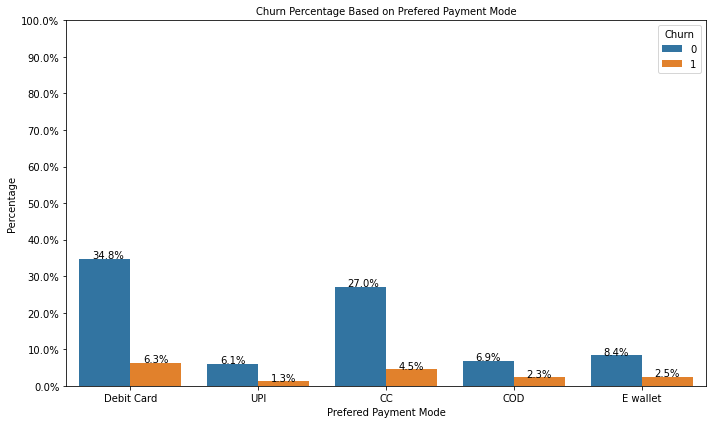

In [405]:
plt.figure(figsize=(10,6))
countplot('PreferredPaymentMode',df)
plt.title('Churn Percentage Based on Prefered Payment Mode',size=10)
plt.xlabel('Prefered Payment Mode',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

In [406]:
df.groupby('PreferredPaymentMode')['Churn'].value_counts(normalize=True).unstack()

Churn,0,1
PreferredPaymentMode,,
CC,0.857948,0.142052
COD,0.750973,0.249027
Debit Card,0.846154,0.153846
E wallet,0.771987,0.228013
UPI,0.826087,0.173913


In [408]:
#uji hipotesis dengan chi square test
from scipy.stats import chi2_contingency

PreferedPaymentMode_chi_test = pd.crosstab(df['PreferredPaymentMode'],df['Churn'])

Ho = "PreferedPaymentMode tidak berkorelasi dengan Churn"
H1= "PreferedPaymentMode berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(PreferedPaymentMode_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 1.4978570960706217e-10 , artinya PreferedPaymentMode berkorelasi dengan Churn


#### Fitur 'Gender'

Dari hasil uji chi square test, perbedaan gender berpengaruh terhadap aktifitas churn. Berdasarkan grafik fitur 'Gender' dibawah terlihat bahwa mayoritas pelanggan yang bertransaksi di e-commerce ini berjenis kelamin laki-laki. Selain itu, sebanyak 10.8% dari total pelanggan yang merupakan pelanggan laki-laki telah melakukan *churn* lebih banyak dibandingkan dengan pelanggan perempuan.

In [409]:
round(df['Gender'].value_counts()*100/df['Gender'].value_counts().sum(),3)

Male      60.107
Female    39.893
Name: Gender, dtype: float64

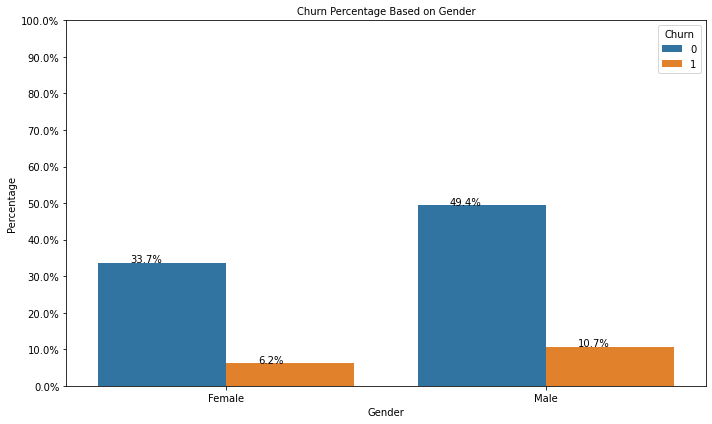

In [410]:
plt.figure(figsize=(10,6))
countplot('Gender',df)
plt.title('Churn Percentage Based on Gender',size=10)
plt.xlabel('Gender',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

In [411]:
#uji hipotesis dengan chi square test
Gender_chi_test = pd.crosstab(df['Gender'],df['Churn'])

Ho = "Gender tidak berkorelasi dengan Churn"
H1= "Gender berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(Gender_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 0.030820940334890086 , artinya Gender berkorelasi dengan Churn


#### Fitur 'PreferedOrderCat'

Fitur 'PreferedOrderCat' berisikan tentang informasi kategori produk yang suka dipesan oleh para pelanggan. Dari hasil analisis data dibawah, fitur ini berpengaruh terhadap aktifitas churn dan kategori laptop & aksesoris nya menjadi kategori produk yang lebih sering dipesan oleh para pelanggan. Hal ini bisa dikaitkan karena mayoritas pelanggan adalah laki-laki. Sedangkan, untuk pelanggan yang melakukan *churn* kebanyakan adalah pelanggan yang membeli produk mobile phone.

In [412]:
round(df['PreferedOrderCat'].value_counts()*100/df['PreferedOrderCat'].value_counts().sum(),3)

Mobile Phone          36.945
Laptop & Accessory    36.412
Fashion               14.671
Grocery                7.282
Others                 4.689
Name: PreferedOrderCat, dtype: float64

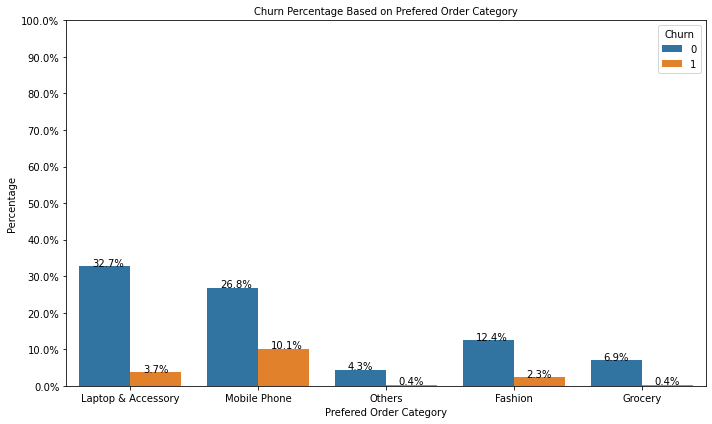

In [413]:
plt.figure(figsize=(10,6))
countplot('PreferedOrderCat',df)
plt.title('Churn Percentage Based on Prefered Order Category',size=10)
plt.xlabel('Prefered Order Category',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

In [414]:
df.groupby('PreferedOrderCat')['Churn'].value_counts(normalize=True).unstack()

Churn,0,1
PreferedOrderCat,,
Fashion,0.845036,0.154964
Grocery,0.951220,0.048780
Laptop & Accessory,0.897561,0.102439
Mobile Phone,0.725962,0.274038
Others,0.924242,0.075758


In [415]:
#uji hipotesis dengan chi square test
PreferedOrderCat_chi_test = pd.crosstab(df['PreferedOrderCat'],df['Churn'])

Ho = "PreferedOrderCat tidak berkorelasi dengan Churn"
H1= "PreferedOrderCat berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(PreferedOrderCat_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 3.119243404287749e-61 , artinya PreferedOrderCat berkorelasi dengan Churn


#### Fitur 'MaritalStatus'

Fitur status pernikahan memiliki korelasi terhadap churn. Berdasarkan grafik dibawah terlihat bahwa mayoritas pelanggan di e-commerce ini telah berstatus menikah. Namun, kebanyakan pelanggan yang melakukan *churn* merupakan pelanggan yang berstatus lajang.

In [416]:
round(df['MaritalStatus'].value_counts()*100/df['MaritalStatus'].value_counts().sum(),3)

Married     53.037
Single      31.901
Divorced    15.062
Name: MaritalStatus, dtype: float64

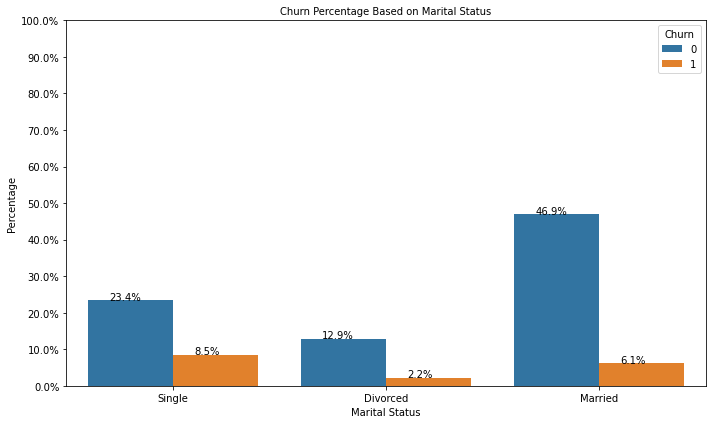

In [417]:
plt.figure(figsize=(10,6))
countplot('MaritalStatus',df)
plt.title('Churn Percentage Based on Marital Status',size=10)
plt.xlabel('Marital Status',size=10)
plt.ylabel('Percentage',size=10)
plt.tight_layout()
plt.show()

In [418]:
#uji hipotesis dengan chi square test
Maritalstatus_chi_test = pd.crosstab(df['MaritalStatus'],df['Churn'])

Ho = "Marital Status tidak berkorelasi dengan Churn"
H1= "Marital Status berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(Maritalstatus_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 1.073011277910542e-41 , artinya Marital Status berkorelasi dengan Churn


# **3. DATA PREPROCESSING**

*Data preprocessing* akan membantu kita dalam menangani *missing values* dengan *imputer* dan mengolah jenis data dengan *encoding dan scaling*. Namun, kita harus memisahkan data menjadi 2 kelompok data yaitu: Train Set dan Test Set.

In [419]:
# train test split

df_train, df_test = train_test_split(
    df, test_size = 0.3, random_state = 88, 
    stratify = df['Churn']
)

In [420]:
# check data distribution of target feature

print(df_train['Churn'].value_counts(normalize=True))
print('========')
print(df_test['Churn'].value_counts(normalize = True))

0    0.831515
1    0.168485
Name: Churn, dtype: float64
0    0.831853
1    0.168147
Name: Churn, dtype: float64


## *Data Split Summary*

Jumlah data pada kolom Churn mengidentifikasi adanya ketidakseimbangan data pada kelas positif. Artinya, jika masalah ini tidak ditindaklanjuti maka hasil prediksi pada model kita akan menghasilkan hasil yang kurang optimal. Oleh karena itu, masalah ini bisa dihindari dengan melakukan teknik *resampling*. Teknik yang bisa kita lakukan adalah bisa melalui `class weight` atau memilih boosting models. 

## *Missing Values*

Bisa kita lihat dari tabel dibawah bahwa kita memiliki missing values pada 7 fitur yaitu `WarehouseToHome`, `HourSpendOnApp`, `DaySinceLastOrder`, `Tenure`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`. Karena semua merupakan jenis data numerik maka kita bisa mengatasi *missing values* dengan *mean/median/constant* pada teknik `SimpleImputer`.

Namun, untuk mengantisipasi adanya missing values di fitur lain pada data baru (*unseen data*) yang belum pernah kita olah/amati, alangkah baiknya jika kita melakukan imputer pada semua fitur. Untuk fitur kategori, kita akan menggunakan teknik simple imputer juga dengan strategy `most_frequent`.

In [421]:
# check more info in each features

list_item = []
for col in df_train.columns:
    list_item.append([col, df_train[col].dtype, 
    len(df_train), df_train[col].isna().sum(), round((df_train[col].isna().sum()/len(df_train[col]))*100,2),
    df_train[col].nunique(), list(df_train[col].drop_duplicates().sample(2, replace=True).values)])

items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)
    
items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,Churn,int64,3941,0,0.00,2,"[1, 1]"
1,CityTier,int64,3941,0,0.00,3,"[3, 1]"
2,Complain,int64,3941,0,0.00,2,"[1, 1]"
3,NumberOfAddress,int64,3941,0,0.00,13,"[5, 11]"
4,SatisfactionScore,int64,3941,0,0.00,5,"[5, 5]"
5,NumberOfDeviceRegistered,int64,3941,0,0.00,6,"[1, 6]"
6,OrderCount,float64,3941,180,4.57,16,"[4.0, 7.0]"
7,CouponUsed,float64,3941,200,5.07,17,"[2.0, 4.0]"
8,OrderAmountHikeFromlastYear,float64,3941,193,4.90,16,"[16.0, 13.0]"
9,CashbackAmount,float64,3941,0,0.00,2338,"[183.55, 180.08]"


## *Encoding*

Berdasarkan visualisasi pada data kategorikal dibawah, kita akan melakukan teknik encoding untuk mengubah jenis data mereka menjadi data numerikal agar bisa diproses oleh model yang akan kita gunakan nanti.

Yang akan kita lakukan adalah menentukan variabel mana saja yang akan menggunakan jenis encoder tertentu. 

ONEHOT ENCODING  
   - `MaritalStatus`, `Gender`: fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.  
   - `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferedOrderCat`: fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit .


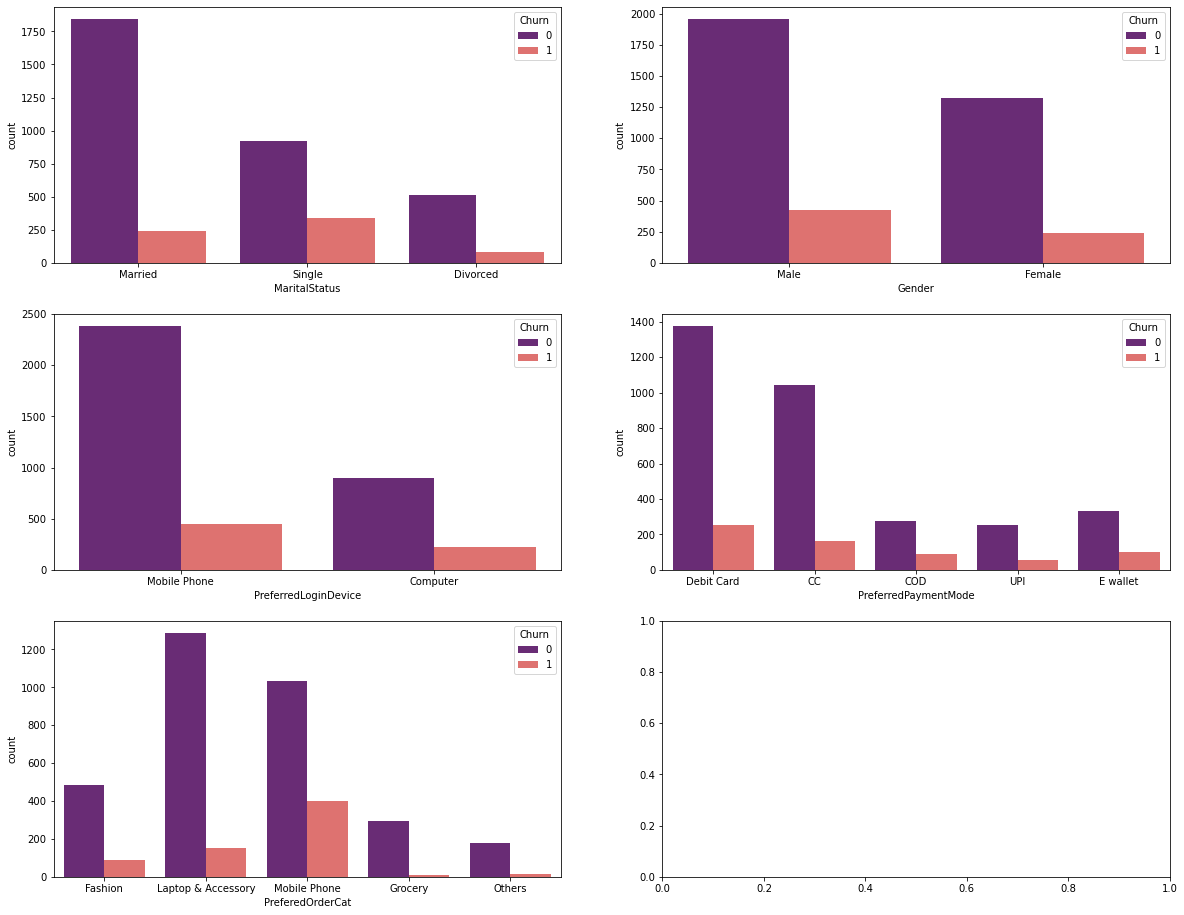

In [422]:
# Categorical EDA 
ctg_var = df_train[['MaritalStatus', 'Gender', 'PreferredLoginDevice', 
        'PreferredPaymentMode', 'PreferedOrderCat']]

# create 5 empty plots
fig, ax = plt.subplots(3, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, int in enumerate(ctg_var):
    sns.countplot(x = int, data = df_train, palette="magma", hue = 'Churn', ax = ax.flatten()[ix])

## *Scaling*

Selanjutnya adalah melihat fitur-fitur numerical mana yang perlu di scaling dan jenis scaling yang cocok untuk masing-masing jenis fitur.
Terlihat bahwa kita memiliki 2 tipe data numerik pada dataset, yaitu integer dan float. Pada data numerik integer, sangat jelas bahwa skala angka yang terdapat pada masing2 fitur tidak kontinu dan jumlah angka unique pada masing2 fitur masih sangat sedikit sehingga jarak angka tidak terlalu jauh. 

Namun, jika dilihat pada variabel yang memiliki float numerik, banyak ditemukan jenis data yang *discrete* pada beberapa fitur. Maka dari itu, sangat penting untuk dilakukan visualisasi lebih lanjut menggunakan *Boxplot* agar kita bisa melihat seberapa ekstrim outlier yang mereka miliki. Setelah itu, kita dapat menentukan tipe scaler yang sesuai dengan penyebaran datanya. 

MINMAX SCALER  
- `OrderAmountHikeFromlastYear`: fitur ini memiliki data outlier yang tidak begitu ekstrim tapi masih aman untuk menggunakan MinMax Scaler. 

ROBUST SCALER   
- `Tenure`
- `WarehouseToHome`
- `CouponUsed`
- `OrderCount`
- `DaySinceLastOrder`
- `CashbackAmount`  
Fitur diatas akan menggunakan Robust Scaler karena data outlier yang mereka miliki cukup ekstrim.

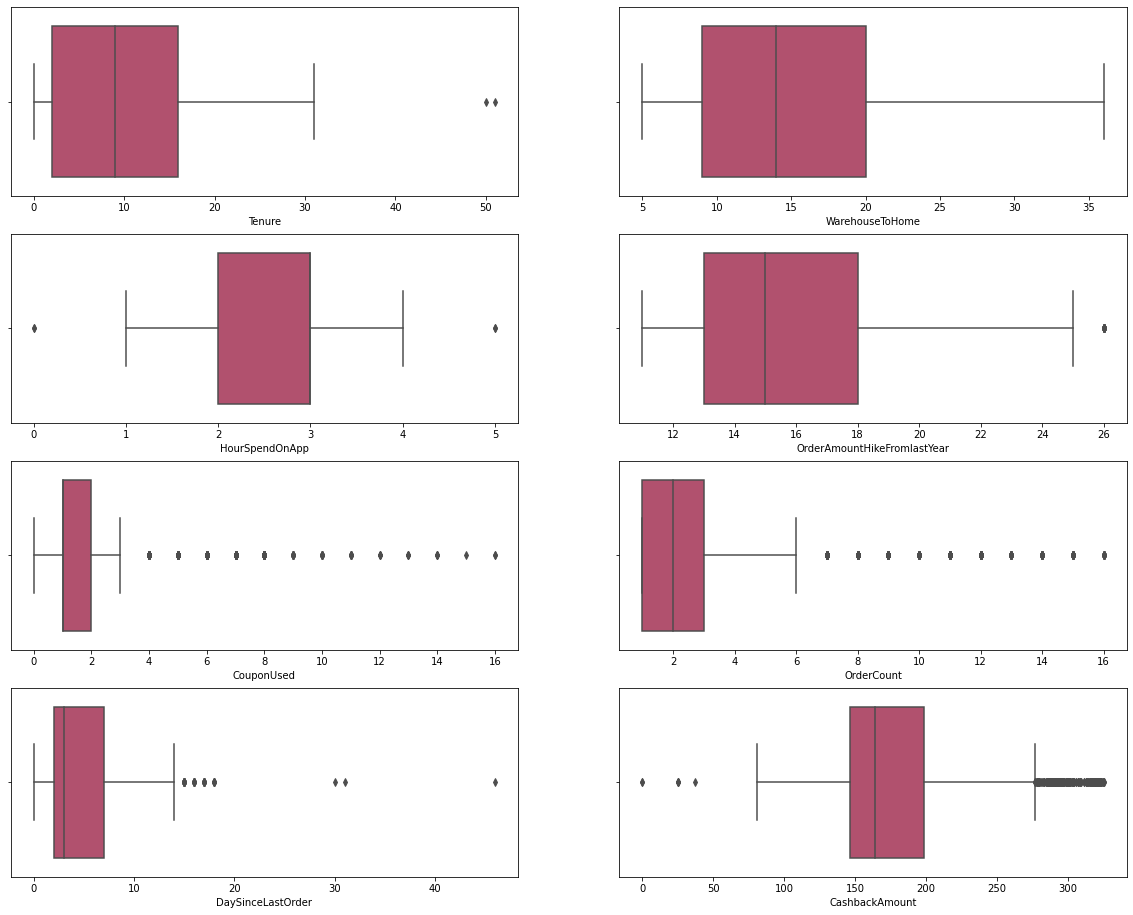

In [423]:
# Numerical EDA for float
float_var = df_train[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

# create 8 empty plots
fig, ax = plt.subplots(4, 2,figsize=(20,16))

# iterate those selected variables visualised in boxplot
for ix, num in enumerate(float_var):
    sns.boxplot(x = num, data = df_train, palette="flare", ax = ax.flatten()[ix])

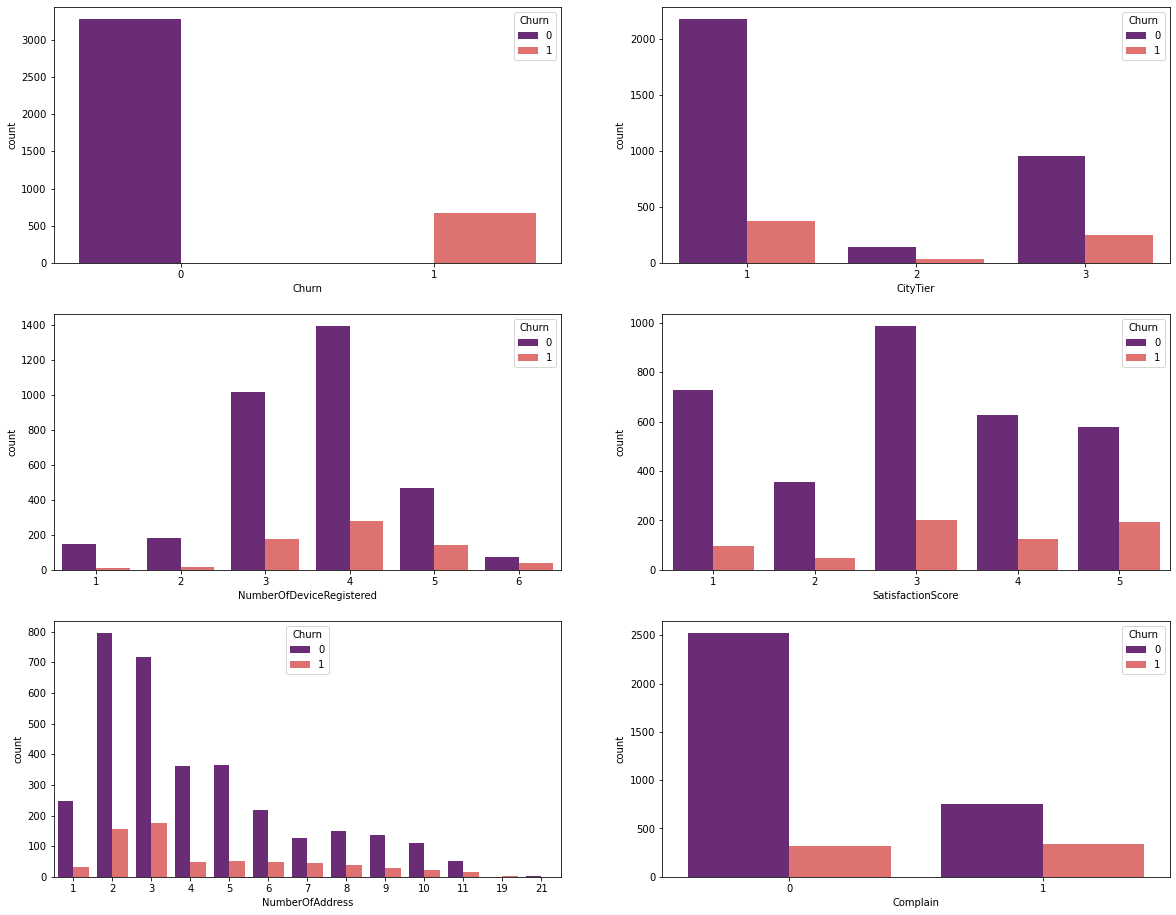

In [12]:
# Numerical EDA for integer
int_var = df_train[['Churn', 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']]

# create 6 empty plots
fig, ax = plt.subplots(3, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, int in enumerate(int_var):
    sns.countplot(x = int, data = df_train, palette="magma", hue = 'Churn', ax = ax.flatten()[ix])

## *Column Transformer*

Pertama, kita tentukan dulu fitur mana yang mau di-scale/encode.  Setelah itu, kita melakukan pipeline dan column transformer pada masing-masing fitur yang akan di-scale/encode. 

Disini kita akan melakukan 2 jenis preprocessing, yaitu preprocessing dengan scaling untuk digunakan pada model yang membutuhkan seperti Logistic Regression dan KNN. Selanjutnya, preprocessing tanpa scaling yang umum digunakan untuk tree-based model karena scaling tidak dibutuhkan pada jenis model ini. 

In [424]:
# splitting data
X_train = df_train.drop('Churn', axis=1)
X_test = df_test.drop('Churn', axis=1)

y_train = df_train['Churn']
y_test = df_test['Churn']

> ### ***Preprocessing with scaler***

In [ ]:
onehot_cols = ['MaritalStatus', 'Gender', 'PreferredLoginDevice', 
        'PreferredPaymentMode', 'PreferedOrderCat']

minmax_cols = ['OrderAmountHikeFromlastYear']

robust_cols = ['Tenure', 'WarehouseToHome', 'CouponUsed', 
        'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

other_num = ['CityTier', 'Complain', 'NumberOfAddress', 
        'SatisfactionScore', 'NumberOfDeviceRegistered', 
        'HourSpendOnApp']

In [426]:
# impute & encode categorical features
onehot_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# impute & scale features of robust scaler
robust_scaler= Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('robust', RobustScaler())
])

# impute & scale features of minmax scaler
minmax_scaler= Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('minmax', MinMaxScaler())
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_1= ColumnTransformer([
        ('onehot', onehot_encoder, onehot_cols),
        ('robust', robust_scaler, robust_cols),
        ('minmax', minmax_scaler, minmax_cols),
        ('num imp', SimpleImputer(strategy = 'median'), other_num),
        
                                                  
], remainder = 'passthrough')


In [427]:
preprocessor_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['MaritalStatus', 'Gender',
                                  'PreferredLoginDevice',
                                  'PreferredPaymentMode', 'PreferedOrderCat']),
                                ('robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', R...
                                 ['Tenure', 'WarehouseToHome', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('minmax',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax', MinMaxScaler())]),
                                 ['OrderAmountHikeFromlastYear']),
                                ('num imp', SimpleImputer(strategy='median'),
                                 ['CityTier', 'Complain', 'NumberOfAddress',
                                  'SatisfactionScore',
                                  'NumberOfDeviceRegistered',
                                  'HourSpendOnApp'])])

In [428]:
X_train_prep_1 = pd.DataFrame(preprocessor_1.fit_transform(X_train),columns=preprocessor_1.get_feature_names_out())
X_train_prep_1.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,onehot__Gender_Male,onehot__PreferredLoginDevice_Mobile Phone,onehot__PreferredPaymentMode_COD,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,...,robust__OrderCount,robust__DaySinceLastOrder,robust__CashbackAmount,minmax__OrderAmountHikeFromlastYear,num imp__CityTier,num imp__Complain,num imp__NumberOfAddress,num imp__SatisfactionScore,num imp__NumberOfDeviceRegistered,num imp__HourSpendOnApp
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.5,1.2,0.845874,0.466667,3.0,0.0,2.0,1.0,3.0,2.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.5,0.8,0.783266,0.200000,1.0,0.0,4.0,4.0,3.0,2.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.5,-0.6,0.057055,0.533333,1.0,1.0,8.0,5.0,3.0,3.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.2,-0.607505,0.333333,3.0,1.0,2.0,4.0,3.0,3.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,1.0,0.227455,0.266667,1.0,0.0,3.0,3.0,5.0,4.0


In [429]:
X_train_prep_1.shape

(3941, 25)

In [430]:
X_test_prep_1 = pd.DataFrame(preprocessor_1.fit_transform(X_test),columns=preprocessor_1.get_feature_names_out())
X_test_prep_1.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,onehot__Gender_Male,onehot__PreferredLoginDevice_Mobile Phone,onehot__PreferredPaymentMode_COD,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,...,robust__OrderCount,robust__DaySinceLastOrder,robust__CashbackAmount,minmax__OrderAmountHikeFromlastYear,num imp__CityTier,num imp__Complain,num imp__NumberOfAddress,num imp__SatisfactionScore,num imp__NumberOfDeviceRegistered,num imp__HourSpendOnApp
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.0,-0.574739,0.133333,1.0,0.0,6.0,1.0,3.0,2.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.2,2.157064,0.533333,1.0,0.0,8.0,2.0,4.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.5,0.2,-0.634201,0.400000,1.0,0.0,1.0,2.0,4.0,3.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.953045,0.333333,1.0,0.0,4.0,4.0,4.0,3.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-0.2,-0.436334,0.466667,3.0,0.0,3.0,1.0,3.0,2.0


In [431]:
X_test_prep_1.shape

(1689, 25)

> ### ***Preprocessing without scaler***

In [432]:
# define all numerical features

num_cols = ['OrderAmountHikeFromlastYear', 'CityTier', 'Complain', 'NumberOfAddress', 
    'SatisfactionScore', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'Tenure', 
    'WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# impute & encode categorical features
onehot_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_2 = ColumnTransformer([
        ('ctg', onehot_encoder, onehot_cols),
        ('num', SimpleImputer(strategy = 'median'), num_cols)
                                                  
], remainder = 'passthrough')


In [433]:
X_train_prep_2 = pd.DataFrame(preprocessor_2.fit_transform(X_train),columns=preprocessor_2.get_feature_names_out())
X_train_prep_2.head()

,ctg__MaritalStatus_Married,ctg__MaritalStatus_Single,ctg__Gender_Male,ctg__PreferredLoginDevice_Mobile Phone,ctg__PreferredPaymentMode_COD,ctg__PreferredPaymentMode_Debit Card,ctg__PreferredPaymentMode_E wallet,ctg__PreferredPaymentMode_UPI,ctg__PreferedOrderCat_Grocery,ctg__PreferedOrderCat_Laptop & Accessory,...,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,3.0,2.0,4.0,14.0,2.0,9.0,9.0,207.93
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,4.0,3.0,2.0,22.0,13.0,0.0,1.0,7.0,204.66
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.0,5.0,3.0,3.0,1.0,35.0,1.0,1.0,0.0,166.73
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,3.0,3.0,0.0,6.0,0.0,1.0,4.0,132.02
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,5.0,4.0,8.0,17.0,2.0,8.0,8.0,175.63


In [434]:
X_train_prep_2.shape

(3941, 25)

In [435]:
X_test_prep_2 = pd.DataFrame(preprocessor_2.transform(X_test),columns=preprocessor_2.get_feature_names_out())
X_test_prep_2.head()

,ctg__MaritalStatus_Married,ctg__MaritalStatus_Single,ctg__Gender_Male,ctg__PreferredLoginDevice_Mobile Phone,ctg__PreferredPaymentMode_COD,ctg__PreferredPaymentMode_Debit Card,ctg__PreferredPaymentMode_E wallet,ctg__PreferredPaymentMode_UPI,ctg__PreferedOrderCat_Grocery,ctg__PreferedOrderCat_Laptop & Accessory,...,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,3.0,2.0,18.0,35.0,1.0,1.0,3.0,134.52
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,8.0,2.0,4.0,4.0,27.0,30.0,1.0,4.0,9.0,267.75
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,3.0,0.0,10.0,0.0,3.0,4.0,131.62
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,3.0,8.0,31.0,3.0,4.0,8.0,209.03
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,1.0,3.0,2.0,12.0,26.0,1.0,2.0,2.0,141.27


In [436]:
X_test_prep_2.shape

(1689, 25)

In [437]:
def calculation_vif(X):
    vif = pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calculation_vif(X_train_prep_1).sort_values(by='VIF', ascending=False).reset_index(drop=True)

,variables,VIF
0,num imp__HourSpendOnApp,21.961754
1,num imp__NumberOfDeviceRegistered,14.885850
2,onehot__PreferedOrderCat_Mobile Phone,10.211707
3,robust__CashbackAmount,9.882902
4,num imp__CityTier,5.805694
5,onehot__PreferedOrderCat_Laptop & Accessory,5.646653
6,num imp__SatisfactionScore,5.414456
7,num imp__NumberOfAddress,4.163621
8,onehot__MaritalStatus_Married,4.012814
9,onehot__PreferredLoginDevice_Mobile Phone,3.449593


# **4. EVALUATION, MODEL SELECTION, AND MODEL TUNING**

Kita akan mencoba beberapa algoritma machine learning yang berbeda. Apapun modelnya, kita ingin model machine learning yang dapat menggeneralisasi dan memprediksi f1-score seakurat mungkin.

- Pertama, kita akan coba menggunakan basic model seperti Decision Tree, Logistic Regression, dan KNN
- Jika model pilihan pertama diatas tidak menghasilkan performance yang baik, maka kita akan coba menggunakan teknik *ensemble learning* seperti: Voting, Bagging, Random Forest, dan beberapa teknik Boosting. 

In [438]:
# define function for model performance

def model_evaluation(X_train, y_train, X_test, y_test, model, name):
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  # Generate classification report
  print(classification_report(y_test, preds))
  print('Average F1 score on training set (5-fold CV):', cv_scores.mean())
  print('F1 score on testing set:', f1_score(y_test, preds))
  print('Confusion Matrix on testing set:\n',confusion_matrix(y_test, preds))

  # Create dictionaries
  train = {'model': name, 'category': 'training', 'score': cv_scores.mean()}
  test = {'model': name, 'category': 'testing', 'score': f1_score(y_test, preds)}
  result = [train, test]

  return pd.DataFrame.from_records(result)

In [439]:
evaluation = pd.DataFrame(columns=['model', 'category', 'score'])
evaluation

,model,category,score


## *4.1 Decision Tree*

Pada model Decision Tree, kita menggunakan data preprocessing yang tanpa Scaling dikarenakan tree-based model tidak sensitif terhadap variance data. 

Jika kita melihat hasil nilai f-1 antara train set (cross validation 5 fold) dan test set, dapat disimpulkan bahwa penggunaan model Decision Tree tidak menyebabkan overfitting maupun underfitting. Namun, disini nilai precisionnya dikategorikan masih rendah yang dapat diartikan bahwa nilai False Positive yang tinggi. 

Ini menjadi salah satu alasan, model Decision Tree mungkin tidak terlalu optimal dalam menangani dataset ini. 

In [443]:
dt = DecisionTreeClassifier(random_state=88, 
                    max_leaf_nodes=100,
                    class_weight='balanced'
                    )

result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test, dt, 'DecisionTreeClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1405
           1       0.57      0.93      0.71       284

    accuracy                           0.87      1689
   macro avg       0.78      0.90      0.81      1689
weighted avg       0.91      0.87      0.88      1689

Average F1 score on training set (5-fold CV): 0.7205589428382957
F1 score on testing set: 0.7076101468624834
Confusion Matrix on testing set:
 [[1205  200]
 [  19  265]]


## *4.2 Logistic Regression*

Data yang kita gunakan adalah data preprocessing yang telah di-scale dan di-encode.

Jika kita melihat hasil score f1 antara data train (cross validation 5 fold) dan data test dibawah, penggunaan model Logistic Regression sepertinya tidak menyebabkan overfitting melainkan underfitting. Model ini menghasilkan f1 score yang tidak terlalu bagus, hanya sekitar 0.57 dengan performa Precision yang rendah.   

Model Logistic Regression sangat sensitif dengan multicollinearity karena akan menyebabkan penurunan pada nilai precision. Oleh karena itu, nilai f1-score pun ikut menurun. Dengan alasan ini, mungkin kita bisa mencoba model lain. 

In [444]:
lr = LogisticRegression(random_state=88, 
                    penalty='l2', 
                    max_iter=1000, 
                    class_weight='balanced'
                )

result = model_evaluation(X_train_prep_1, y_train, X_test_prep_1, y_test, lr, 'LogisticRegression')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      1405
           1       0.44      0.81      0.57       284

    accuracy                           0.80      1689
   macro avg       0.70      0.80      0.72      1689
weighted avg       0.87      0.80      0.82      1689

Average F1 score on training set (5-fold CV): 0.5767509276282802
F1 score on testing set: 0.5717821782178218
Confusion Matrix on testing set:
 [[1112  293]
 [  53  231]]


## *4.3 KNN*

Persis dengan Logistic Regression datas, data yang kita gunakan adalah data preprocessing yang telah di-scale dan di-encode.

Pada model KNN, hasil score f1 antara training (cross validation 5 fold) dan testing lumayan memiliki jarak yang jauh sekitar 0.04. Dapat disimpulkan bahwa penggunaan model KNN menyebabkan sedikit overfitting. Semakin tinggi nilai n_neighbours yang dimasukkan, semakin rendah nilai Recall sehingga mempengaruhi nilai f1-score.

Penggunaan model KNN memang cenderung overfitting bisa disebabkan oleh data kita yang lumayan besar dengan fitur yang kompleks. Oleh karena itu, kita akan mencoba teknik *Ensemble Method*.


In [445]:
knn = KNeighborsClassifier()

result = model_evaluation(X_train_prep_1, y_train, X_test_prep_1, y_test, knn, 'KNN')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1405
           1       0.77      0.48      0.59       284

    accuracy                           0.89      1689
   macro avg       0.84      0.73      0.77      1689
weighted avg       0.88      0.89      0.88      1689

Average F1 score on training set (5-fold CV): 0.5560776060877426
F1 score on testing set: 0.594360086767896
Confusion Matrix on testing set:
 [[1365   40]
 [ 147  137]]


## *4.4 Voting*

Voting adalah salah satu teknik ensemble yang didefinisikan sebagai teknik pengambilan prediksi berdasarkan suara terbanyak / rekomendasi maksimum dari beberapa model (base learners). Disini base learners yang kita pakai yaitu: Logistic Regression, Decision Tree, dan KNN. 

Dari analisa nilai F1 pada training (cross validation 5 fold), kita dapat melihat selisih yang lumayan dekat dimana selisih antara training dan testing mencapai 0.03 yang menandakan performa model lumayan stabil namun trade-off pada nilai precision yang cenderung rendah. 

In [449]:
base_learners = [
    ('log_reg', LogisticRegression(random_state=88, 
                                    penalty='l2', 
                                    max_iter=1000, 
                                    class_weight='balanced')),
    ('dt', DecisionTreeClassifier(random_state=88, 
                                    max_leaf_nodes=100,
                                    class_weight='balanced')),
    ('knn', KNeighborsClassifier())
]
voting_classifier = VotingClassifier(estimators=base_learners, voting='soft')

result = model_evaluation(X_train_prep_1, y_train, X_test_prep_1, y_test, voting_classifier, 'VotingClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1405
           1       0.68      0.88      0.77       284

    accuracy                           0.91      1689
   macro avg       0.83      0.90      0.86      1689
weighted avg       0.93      0.91      0.92      1689

Average F1 score on training set (5-fold CV): 0.7536131822214528
F1 score on testing set: 0.7704160246533128
Confusion Matrix on testing set:
 [[1290  115]
 [  34  250]]


## *4.5 Random Forest*

Random Forest adalah teknik Bagging yang terdiri dari sejumlah model decision tree pada berbagai kelompok dari dataset yang ada. 
Berbeda dengan Decision Tree yang hanya memiliki satu pohon keputusan, Random Forest menghasilkan prediksi dari setiap pohon keputusan yang ada dan mengambil nilai prediksi yang paling banyak dipilih sebagai hasil terakhir.

Sama dengan Decision Tree, pada Random Forest kita akan memakai data preprocessing yang tanpa scaling. Dari analisa nilai f1 pada training (cross validation 5 fold) dan testing, didapatkan bahwa selisih scorenya tidak berbeda jauh. Namun nilainya bisa dibilang tidak terlalu tinggi yang berada di nilai 0.72 dengan performa Precision yang rendah. Dengan alasan ini, kita coba menggunakan teknik Boosting.


In [453]:
rf = RandomForestClassifier(random_state=88, 
                            n_estimators=100,
                            class_weight = 'balanced', 
                            criterion = 'entropy', 
                            max_depth = 13, 
                            min_samples_split = 0.01)


result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test, rf, 'RandomForestClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1405
           1       0.64      0.82      0.72       284

    accuracy                           0.89      1689
   macro avg       0.80      0.86      0.83      1689
weighted avg       0.91      0.89      0.90      1689

Average F1 score on training set (5-fold CV): 0.7362186414368833
F1 score on testing set: 0.7188940092165899
Confusion Matrix on testing set:
 [[1272  133]
 [  50  234]]


## *4.6 AdaBoost*

Boosting pertama yang kita coba adalah AdaBoost atau Adaptive Boosting. Cara kerja dari algoritma pada model seperti cara kerja teknik Boosting pada umumnya.

Disini kita akan menjadikan DecisionTree sebagai base estimator dan menggunakan olahan fitur dari hasi preprocessing yang tanpa scaling. Dapat dilihat kita menggunakan Decision Tree sebagai base estimator-nya. 

Dapat diketahui hasil f1 pada train set (cross validation 5 fold) dan test set tidak terlalu beda jauh yaitu 0.67/0.66. Namun terlihat nilai Recall yang tidak optimal hanya sekitar 0.57 yang artinya angka False Negatif yang tinggi dimana dalam kasus Churn, ini sangat krusial.

Model AdaBoost sangat sensitif pada data outlier, oleh karena itu menyebabkan nilai f1-score kurang optimal. Maka dari itu model AdaBoost merupakan model yang belum layak kita gunakan.

In [462]:
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=88)

dtclf.fit(X_train_prep_2, y_train)
y_val_pred = dtclf.predict(X_test_prep_2)
print(f1_score(y_test, y_val_pred))


0.5506329113924051


In [465]:
# default parameter

ab = AdaBoostClassifier(base_estimator=dtclf,
                        learning_rate=0.6,
                        n_estimators=98,
                        algorithm='SAMME.R'
                        ) 


result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test, ab, 'AdaBoostClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1405
           1       0.78      0.57      0.66       284

    accuracy                           0.90      1689
   macro avg       0.85      0.77      0.80      1689
weighted avg       0.89      0.90      0.89      1689

Average F1 score on training set (5-fold CV): 0.667826251716977
F1 score on testing set: 0.6572008113590264
Confusion Matrix on testing set:
 [[1358   47]
 [ 122  162]]


## *4.7 XGBoost*

Setelah melihat hasil f1-score pada model Random Forest dan AdaBoost yang belum terlalu optimal, kita akan mencoba XGBoost sebagai pilihan kedua pada teknik Boosting. Kelebihan utama XGBoost dibanding yang lain ada pada kecepatan dalam melakukan training. 

Setelah kita coba jalankan model ini, dapat disimpulkan bahwa hasil f1-score pada test set yang berada di angka 0.88 lebih tinggi dari train set yaitu 0.85; selisih mencapai 0.03. Nilai pada Precision dan Recall juga tinggi dan seimbang yang artinya jika Precision bernilai lebih tinggi berarti algoritma pada model tersebut mampu memprediksi hasil yang lebih relevan daripada yang tidak relevan, dan nilai Recall yang tinggi berarti suatu algoritma pada model mampu memprediksi kelas positif dengan akurat. 

Maka dari itu, model XGBoost merupakan model yang lebih layak dari model yang lain. Namun, bukan berarti proses training model berhenti disini saja. Saya akan mencoba teknik Boosting selanjutnya yaitu CatBoost untuk melihat apakah kita bisa mendapatkan performa yang lebih baik pada nilai f1.


In [466]:
xgb = XGBClassifier(n_estimators = 100, 
                    max_depth = 7, 
                    n_jobs = -1, 
                    eval_metric = 'logloss', 
                    gamma = 1,
                    random_state=88)
result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test,  xgb, 'XGBClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1405
           1       0.93      0.85      0.88       284

    accuracy                           0.96      1689
   macro avg       0.95      0.92      0.93      1689
weighted avg       0.96      0.96      0.96      1689

Average F1 score on training set (5-fold CV): 0.8452754709218204
F1 score on testing set: 0.8839779005524862
Confusion Matrix on testing set:
 [[1386   19]
 [  44  240]]


## *4.8 CatBoost*

Tidak seperti XGBoost dimana pohon tumbuh secara asimetris, pohon-pohon pada Catboost ditanam secara simetris sehingga semua pohon seimbang. Karakteristik pohon seimbang (balanced tree) ini memberikan beberapa manfaat, termasuk kemampuan untuk mengontrol/mendeteksi masalah overfitting dan waktu inferensi yang lebih rendah. CatBoost melakukan ini dengan menggunakan kondisi yang sama di setiap pemisahan pada node masing-masing pohon.

Kelebihan utama pada CatBoost terletak pada kemampuan model untuk menangani berbagai jenis fitur secara otomatis terutama pada fitur kategoris. Disini, kita hanya memberi tahu Catboost fitur mana yang merupakan fitur kategoris dengan menggunakan parameter `cat_features`. Oleh karena itu, diperlukan melakukan data preprocessing tanpa encoding ataupun scaling. 

Kelebihan lainnya adalah CatBoost lebih cepat dari XGBoost dalam menjalankan training pada data yang artinya kita bisa menghemat waktu lebih banyak. 

Meskipun f1 score pada train set 100% akurat, nilai f1 pada test set juga sama tingginya yaitu di angka 0.91 terlepas adanya selisih sebesar 0.09 dimana selisih antara nilai masih normal. 

In [467]:
# Preprocessing without scaler and encoding

# define numerical features
ctg_cols = ['MaritalStatus', 'Gender', 'PreferredLoginDevice', 
        'PreferredPaymentMode', 'PreferedOrderCat']

num_cols = ['OrderAmountHikeFromlastYear', 'CityTier', 'Complain', 'NumberOfAddress', 
    'SatisfactionScore', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'Tenure', 
    'WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# impute categorical features 
ctg_cols_prep = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value='Missing')),
])

# impute numerical feature
num_cols_prep = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_3 = ColumnTransformer([
        ('ctg', ctg_cols_prep, ctg_cols),
        ('num', num_cols_prep, num_cols)         
], remainder = 'passthrough')

X_train_prep_3 = pd.DataFrame(preprocessor_3.fit_transform(X_train),columns=preprocessor_3.get_feature_names_out())
X_train_prep_3.head()

,ctg__MaritalStatus,ctg__Gender,ctg__PreferredLoginDevice,ctg__PreferredPaymentMode,ctg__PreferedOrderCat,num__OrderAmountHikeFromlastYear,num__CityTier,num__Complain,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,Married,Male,Mobile Phone,Debit Card,Fashion,18.0,3.0,0.0,2.0,1.0,3.0,2.0,4.0,14.0,2.0,9.0,9.0,207.93
1,Married,Male,Mobile Phone,Debit Card,Fashion,14.0,1.0,0.0,4.0,4.0,3.0,2.0,22.0,13.0,0.0,1.0,7.0,204.66
2,Married,Male,Mobile Phone,CC,Laptop & Accessory,19.0,1.0,1.0,8.0,5.0,3.0,3.0,1.0,35.0,1.0,1.0,0.0,166.73
3,Single,Female,Mobile Phone,COD,Mobile Phone,16.0,3.0,1.0,2.0,4.0,3.0,3.0,0.0,6.0,0.0,1.0,4.0,132.02
4,Married,Male,Computer,COD,Laptop & Accessory,15.0,1.0,0.0,3.0,3.0,5.0,4.0,8.0,17.0,2.0,8.0,8.0,175.63


In [468]:
X_test_prep_3 = pd.DataFrame(preprocessor_3.transform(X_test),columns=preprocessor_3.get_feature_names_out())
X_test_prep_3.head()

,ctg__MaritalStatus,ctg__Gender,ctg__PreferredLoginDevice,ctg__PreferredPaymentMode,ctg__PreferedOrderCat,num__OrderAmountHikeFromlastYear,num__CityTier,num__Complain,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,Single,Male,Mobile Phone,CC,Mobile Phone,13.0,1.0,0.0,6.0,1.0,3.0,2.0,18.0,35.0,1.0,1.0,3.0,134.52
1,Single,Female,Mobile Phone,Debit Card,Grocery,19.0,1.0,0.0,8.0,2.0,4.0,4.0,27.0,30.0,1.0,4.0,9.0,267.75
2,Divorced,Male,Computer,Debit Card,Mobile Phone,17.0,1.0,0.0,1.0,2.0,4.0,3.0,0.0,10.0,0.0,3.0,4.0,131.62
3,Divorced,Male,Mobile Phone,COD,Fashion,16.0,1.0,0.0,4.0,4.0,4.0,3.0,8.0,31.0,3.0,4.0,8.0,209.03
4,Married,Male,Computer,Debit Card,Laptop & Accessory,18.0,3.0,0.0,3.0,1.0,3.0,2.0,12.0,26.0,1.0,2.0,2.0,141.27


In [469]:
params = {"iterations": 1000,
         "eval_metric": "F1",
         "random_state":88,         
        }
cat_tr = Pool(
    data= X_train_prep_3, label=y_train, 
    cat_features= ['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)
cat_val = Pool(data=X_test_prep_3, label=y_test, 
    cat_features=['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)

In [470]:
cat = CatBoostClassifier(**params)
cat.fit(cat_tr, eval_set=cat_val, early_stopping_rounds=100, use_best_model=True, verbose=10)

Learning rate set to 0.044466
0:	learn: 0.6265256	test: 0.5976563	best: 0.5976563 (0)	total: 27.7ms	remaining: 27.7s
10:	learn: 0.5757291	test: 0.5426696	best: 0.5976563 (0)	total: 99.5ms	remaining: 8.94s
20:	learn: 0.6182846	test: 0.5550661	best: 0.5976563 (0)	total: 154ms	remaining: 7.18s
30:	learn: 0.6522556	test: 0.5809313	best: 0.5976563 (0)	total: 210ms	remaining: 6.56s
40:	learn: 0.6721763	test: 0.6173913	best: 0.6173913 (40)	total: 258ms	remaining: 6.04s
50:	learn: 0.6988171	test: 0.6379310	best: 0.6379310 (49)	total: 323ms	remaining: 6.01s
60:	learn: 0.7166065	test: 0.6379310	best: 0.6437768 (53)	total: 386ms	remaining: 5.94s
70:	learn: 0.7274368	test: 0.6778243	best: 0.6778243 (70)	total: 437ms	remaining: 5.71s
80:	learn: 0.7497774	test: 0.6820084	best: 0.6820084 (80)	total: 500ms	remaining: 5.67s
90:	learn: 0.7580071	test: 0.6943867	best: 0.6943867 (90)	total: 556ms	remaining: 5.55s
100:	learn: 0.7708516	test: 0.7063655	best: 0.7063655 (97)	total: 607ms	remaining: 5.4s
110:	

In [471]:
print('CatBoost f-1 score Train: ', f1_score(y_train, cat.predict(cat_tr)))
print('CatBoost f-1 score Test: ', f1_score(y_test, cat.predict(cat_val)))

print('Classif Train:\n',classification_report(y_train, cat.predict(cat_tr)))
print('Confusion Matrix CatBoost Train:\n',confusion_matrix(y_train, cat.predict(cat_tr) ))

print('===================')

print('Classif Val:\n',classification_report(y_test, cat.predict(cat_val)))
print('Confusion Matrix CatBoost Val:\n',confusion_matrix(y_test, cat.predict(cat_val)))

CatBoost f-1 score Train:  0.9969834087481146
CatBoost f-1 score Test:  0.9094269870609981
Classif Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941

Confusion Matrix CatBoost Train:
 [[3276    1]
 [   3  661]]
Classif Val:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1405
           1       0.96      0.87      0.91       284

    accuracy                           0.97      1689
   macro avg       0.97      0.93      0.95      1689
weighted avg       0.97      0.97      0.97      1689

Confusion Matrix CatBoost Val:
 [[1394   11]
 [  38  246]]


In [472]:
train = {'model': 'CatBoostClassifier', 'category': 'training', 'score': f1_score(y_train, cat.predict(cat_tr))}
test = {'model': 'CatBoostClassifier', 'category': 'testing', 'score': f1_score(y_test, cat.predict(cat_val))}
result = [train, test]

evaluation = evaluation.append(result)

In [473]:
f1_score(y_test, cat.predict_proba(cat_val)[:,1] >= 0.5)

0.9094269870609981

In [74]:
y_train_proba = cat.predict_proba(X_train_prep_3)
pr_curve_raw = precision_recall_curve(y_train, y_train_proba[:, 1])

## *4.9 Model Visualisation*

Setelah melakukan training dan testing menggunakan 8 model di atas, kita dapat melakukan visualisasi untuk melihat model mana yang memiliki nilai F1 score (harmonic mean recall dan precision) tertinggi.

Didapatkan bahwa model CatBoost memiliki score f1 yang paling tertinggi dari model yang lainnya diikuti oleh XGBoost dan Voting Classifier. Model dengan nilai f1 paling terkecil  adalah Logistic Regression dan KNN. 

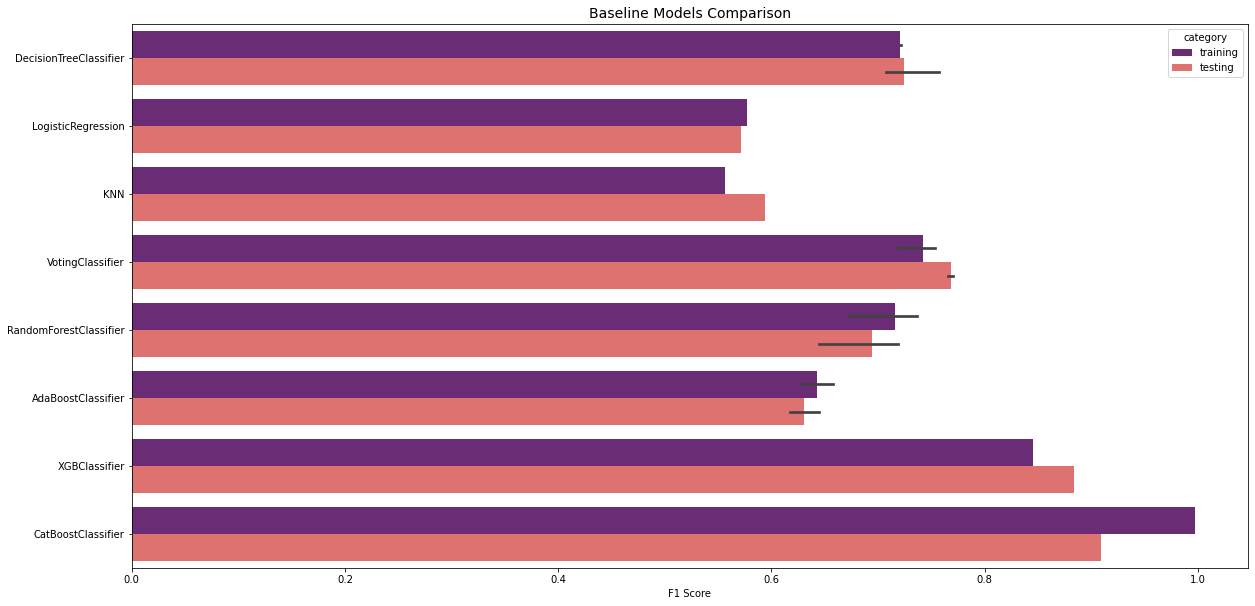

In [474]:
plt.figure(figsize=(20, 10))
sns.barplot(y='model', x='score', data=evaluation, hue='category', palette='magma')
plt.title('Baseline Models Comparison', size=14)
plt.ylabel('')
plt.xlabel('F1 Score')
plt.show()

# **5. HYPERPARAMETER TUNING & METRIC ANALYSIS**

Dikarenakan model Catboost yang memiliki nilai f1-score paling tinggi dibanding model lainnya, model ini akan menjadi pilihan utama yang akan kita gunakan untuk proses selanjutnya. Namun karena adanya sedikit overfitting, kita akan mencoba untuk melakukan Hyperparameter Tuning pada CatBoost menggunakan metode GridSearchCV. Setelah itu kita akan melakukan analisa metrik dari hasil yang kita dapatkan setelah tuning.

## *5.1 Hyperparameter Tuning*

In [481]:
cat_clf = CatBoostClassifier()

param_space = { 'iterations' : [1000, 1500],
                'depth' : [5, 7, 10],
                'learning_rate': [0.01],  
                'l2_leaf_reg': [5, 10, 15, 20],
                'eval_metric': ['F1'],
                'random_state' : [88],
                'od_type' : ['Iter'],
                'od_wait' : [100, 200]
            }

grid_cat = GridSearchCV(estimator=cat_clf, param_grid = param_space, cv = 5, n_jobs=-1)
    

grid_cat.fit(X_train_prep_2, y_train)

0:	learn: 0.6782007	total: 63.5ms	remaining: 1m 35s
1:	learn: 0.6709091	total: 134ms	remaining: 1m 40s
2:	learn: 0.6832413	total: 149ms	remaining: 1m 14s
3:	learn: 0.6605166	total: 178ms	remaining: 1m 6s
4:	learn: 0.6469501	total: 205ms	remaining: 1m 1s
5:	learn: 0.6592179	total: 223ms	remaining: 55.5s
6:	learn: 0.6752294	total: 239ms	remaining: 50.9s
7:	learn: 0.6840149	total: 253ms	remaining: 47.1s
8:	learn: 0.6851339	total: 264ms	remaining: 43.8s
9:	learn: 0.6778087	total: 292ms	remaining: 43.6s
10:	learn: 0.6895273	total: 308ms	remaining: 41.6s
11:	learn: 0.6998158	total: 319ms	remaining: 39.6s
12:	learn: 0.6942149	total: 343ms	remaining: 39.3s
13:	learn: 0.7039413	total: 353ms	remaining: 37.5s
14:	learn: 0.7038391	total: 358ms	remaining: 35.5s
15:	learn: 0.7052342	total: 372ms	remaining: 34.5s
16:	learn: 0.6999077	total: 388ms	remaining: 33.8s
17:	learn: 0.7040441	total: 398ms	remaining: 32.8s
18:	learn: 0.7034991	total: 409ms	remaining: 31.9s
19:	learn: 0.6962142	total: 421ms	rem

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7feddcbfc7c0>,
             n_jobs=-1,
             param_grid={'depth': [5, 7, 10], 'eval_metric': ['F1'],
                         'iterations': [1000, 1500],
                         'l2_leaf_reg': [5, 10, 15, 20],
                         'learning_rate': [0.01], 'od_type': ['Iter'],
                         'od_wait': [100, 200], 'random_state': [88]})

In [482]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_cat.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_cat.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_cat.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9601612913602645

 The best parameters across ALL searched params:
 {'depth': 10, 'eval_metric': 'F1', 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.01, 'od_type': 'Iter', 'od_wait': 100, 'random_state': 88}


## *5.2 Create Model with Best Parameter*

Setelah kita mengetahui parameter terbaik dari hasil *Parameter Tuning* diatas, maka langkah selanjutnya adalah menjalankan model yang kita pilih tadi, yaitu CatBoost dengan parameter terbaik yang kita dapatkan.

Hasil yang kita dapatkan setelah menggunakan parameter terbaik dari GridSearch menunjukkan perubahan. Sebelumnya nilai score kita pada test set hanya sekitar 0.91. Setelah di-tuning, score f1 pada test set menjadi 0.93. Oleh karena itu, kita akan menggunakan model CatBoost dengan parameter yang didapat setelah hyperparameter tuning. 

In [485]:
best_params = {'depth': 10, 
            'eval_metric': 'F1', 
            'iterations': 1500, 
            'l2_leaf_reg': 5, 
            'learning_rate': 0.01, 
            'od_type': 'Iter', 
            'od_wait': 100, 
            'random_state': 88
        }
        
cat_tr = Pool(
    data= X_train_prep_3, label=y_train, 
    cat_features= ['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)
cat_val = Pool(data=X_test_prep_3, label=y_test, 
    cat_features=['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)

In [517]:
cat_tuned = CatBoostClassifier(**best_params)
cat.fit(cat_tr, eval_set=cat_val, early_stopping_rounds=100, use_best_model=True, verbose=10)

0:	learn: 0.5886940	test: 0.5488372	best: 0.5488372 (0)	total: 64.5ms	remaining: 1m 36s
10:	learn: 0.6139535	test: 0.5482456	best: 0.5982906 (1)	total: 193ms	remaining: 26.2s
20:	learn: 0.6629936	test: 0.5733042	best: 0.5982906 (1)	total: 301ms	remaining: 21.2s
30:	learn: 0.6758494	test: 0.5887446	best: 0.5982906 (1)	total: 470ms	remaining: 22.3s
40:	learn: 0.6964448	test: 0.5995717	best: 0.6068376 (38)	total: 553ms	remaining: 19.7s
50:	learn: 0.7085610	test: 0.6034483	best: 0.6068376 (38)	total: 862ms	remaining: 24.5s
60:	learn: 0.7175295	test: 0.6140725	best: 0.6140725 (60)	total: 994ms	remaining: 23.4s
70:	learn: 0.7284287	test: 0.6297872	best: 0.6297872 (70)	total: 1.08s	remaining: 21.8s
80:	learn: 0.7370337	test: 0.6382979	best: 0.6396588 (77)	total: 1.16s	remaining: 20.3s
90:	learn: 0.7504521	test: 0.6481876	best: 0.6495726 (85)	total: 1.22s	remaining: 18.9s
100:	learn: 0.7634409	test: 0.6652632	best: 0.6708595 (99)	total: 1.3s	remaining: 18s
110:	learn: 0.7768889	test: 0.6806723

In [490]:
print('CatBoost f-1 score Train: ', f1_score(y_train, cat.predict(cat_tr)))
print('CatBoost f-1 score Test: ', f1_score(y_test, cat.predict(cat_val)))

print('Classif Train:\n',classification_report(y_train, cat.predict(cat_tr)))
print('Confusion Matrix CatBoost Train:\n',confusion_matrix(y_train, cat.predict(cat_tr) ))

print('===================')

print('Classif Val:\n',classification_report(y_test, cat.predict(cat_val)))
print('Confusion Matrix CatBoost Val:\n',confusion_matrix(y_test, cat.predict(cat_val)))

CatBoost f-1 score Train:  0.9969788519637462
CatBoost f-1 score Test:  0.9316081330868761
Classif Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.99      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941

Confusion Matrix CatBoost Train:
 [[3277    0]
 [   4  660]]
Classif Val:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1405
           1       0.98      0.89      0.93       284

    accuracy                           0.98      1689
   macro avg       0.98      0.94      0.96      1689
weighted avg       0.98      0.98      0.98      1689

Confusion Matrix CatBoost Val:
 [[1400    5]
 [  32  252]]


## *5.3 ROC AUC Score*

**Sensitivity / True Positive Rate / Recall** tells us what proportion of the positive class got correctly classified.

Formula: TP/(TP+FN)

Example: proportion of the actual people who churn that were correctly detected by the model.

**False Negative Rate** tells us what proportion of the positive class got incorrectly classified by the classifier. A higher TPR and a lower FNR is desirable if we want to correctly classify the positive class.

Formula: FN/(TP+FN)

**Specificity / True Negative Rate** tells us what proportion of the negative class got correctly classified.

Formula: TN/(TN+FP)

Example: proportion of people who won't churn were correctly identified by the model.

**False Positive Rate** tells us what proportion of the negative class got incorrectly classified by the classifier. A higher TNR and a lower FPR is desirable if we want to correctly classify the negative class.

Formula: FP/(TN+FP) = 1 - Specificity

**The Receiver Operator Characteristic (ROC) curve** is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Source: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

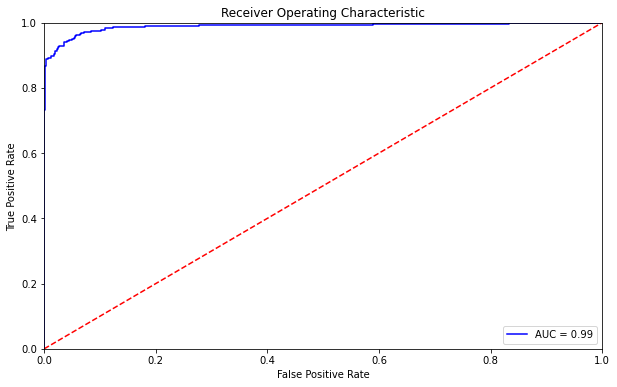

In [494]:
# calculate the fpr and tpr for all thresholds of the classification
probs = cat.predict_proba(cat_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CONFUSION MATRIX - TEST SET


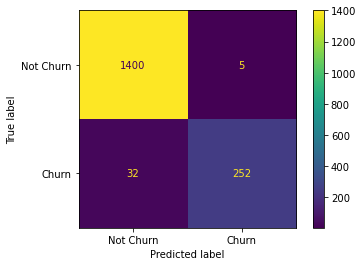

In [498]:
y_test_pred = cat.predict(cat_val)
confusion_matrix_catboost = confusion_matrix(y_test, y_test_pred)

print("CONFUSION MATRIX - TEST SET")
ConfusionMatrixDisplay(confusion_matrix_catboost, display_labels=np.array(['Not Churn', 'Churn'])).plot();

# **6. FEATURE IMPORTANCE BY SHAP**

Untuk mendapatkan gambaran tentang fitur mana yang paling penting untuk sebuah model, kita dapat memplot nilai SHAP dari setiap fitur untuk setiap sampel.

Pada **grafik pertama** menunjukkan fitur yang paling mempengaruhi model dalam meningkatkan prediksi. Disimpulkan bahwa fitur `Tenure` yang sangat memberikan pengaruh tinggi pada hasil prediksi diikuti dengan fitur `Complain`, `MaritalStatus`, `PreferredOrderCat`, dan seterusnya. 

Pada **grafik kedua** dengan konsep visualisasi yang berbeda. Plot ini tidak saja mengurutkan fitur berdasarkan jumlah besaran nilai SHAP pada semua sampel, tapi juga menggunakan nilai SHAP untuk menunjukkan dampak distribusi yang dimiliki setiap fitur pada output model. Keterangan lebih lanjut dapat dilihat dibawah ini:
- Kumpulan titik-titik yang membentuk warna adalah titik yang kita dapat dari setiap data observasi
- Warna biru berarti data observasi yang memiliki nilai rendah
- Warna merah berarti data observasi yang memiliki nilai tinggi
- Warna abu-abu mengindikasikan kategori pada fitur tidak terbaca karena masih dalam tipe numerik. 

Text(0.5, 1.0, 'SHAP Importance')

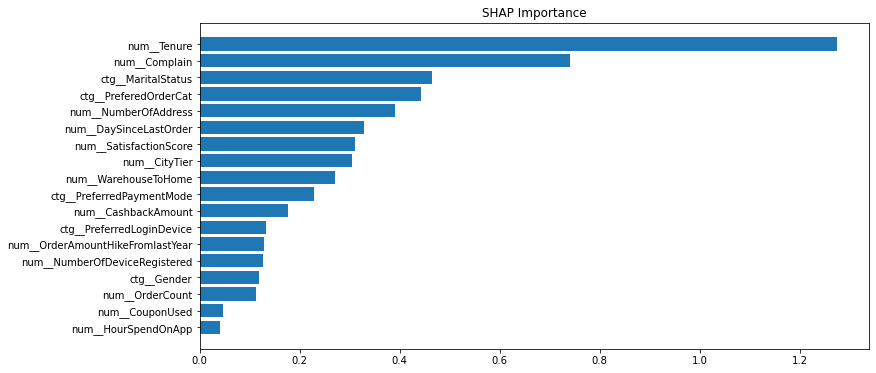

In [514]:
explainer = shap.Explainer(cat)
shap_values = explainer(X_test_prep_3)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test_prep_3.columns)[sorted_idx])
plt.title('SHAP Importance')

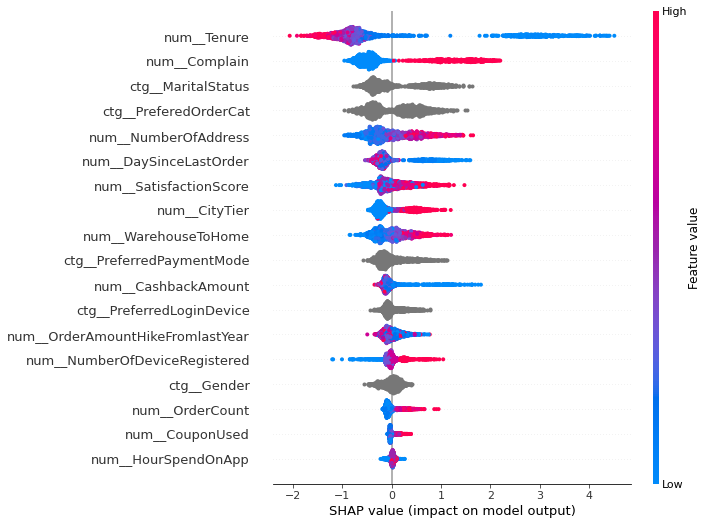

In [516]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=20)

### *Analisa Feature Importance*

1. `Tenure`  
   Semakin singkat berlangganan, potensi churn semakin meningkat

2. `Complain`  
   Semakin banyak complain, potensi churn semakin meningkat

3. `NumberOfAddress`  
   Semakin banyak jumlah alamat yang terdaftar, potensi churn semakin meningkat

4. `DaySinceLastOrder`  
   Semakin singkat interval pemesanan, potensi churn semakin meningkat

5. `SatisfactionScore`  
   Semakin tinggi nilai kepuasan, potensi churn semakin meningkat

6. `CityTier`  
   Semakin tinggi tingkat Tier pada suatu kota,  potensi churn semakin meningkat
    
7. `WarehouseToHome`  
   Semakin jauh jarak dari gudang ke rumah, potensi churn semakin meningkat

8. `CashbackAmount`  
   Semakin sedikit jumlah cashback yang didapatkan, potensi churn semakin meningkat

# **7. CONCLUSION AND RECOMMENDATION**

## 7.1 Conclusion
Berdasarkan performa model machine learning yang telah dibangun, didapatkan bahwa performa model CatBoost yang sangat baik dengan menghasilkan nilai F1 score sekitar 0.93. 

Berdasarkan Confusion Matrix dan Classification Report dibawah ini, kita dapat menyimpulkan bahwa bila seandainya nanti perusahaan bersangkutan menggunakan model kita untuk menyaring list pelanggan yang akan Churn, kita mampu memberikan 93% akurasi(f1) secara keseluruhan. 

Dengan detail yang lebih lanjut, model kita akan memberikan nilai prediksi recall mencapai 89%. Artinya, dari 100 customer yang churn, 89 orang berhasil terprediksi. Kalau dilihat dari nilai precision, model kita memberikan nilai prediksi 98% yang artinya dari 100 customer yang diprediksi churn, 98 yang faktanya churn. Maka dengan menggunakan model ini, diasumsikan tim marketing mampu menghemat waktu dalam menyusun strategi untuk mengambil tindakan pada pelanggan yang diprediksi churn. Tidak hanya waktu, mereka pun juga bisa menghemat budget marketing karena dengan model ini mereka bisa melakukan *budget strategy* pada *segmented customer* yang churn. 


CONFUSION MATRIX - TEST SET


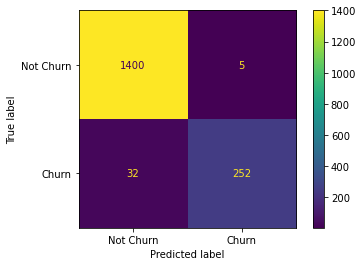

In [519]:
y_test_pred = cat.predict(cat_val)
confusion_matrix_catboost = confusion_matrix(y_test, y_test_pred)

print("CONFUSION MATRIX - TEST SET")
ConfusionMatrixDisplay(confusion_matrix_catboost, display_labels=np.array(['Not Churn', 'Churn'])).plot();

In [520]:
print('Classif Val:\n',classification_report(y_test, cat.predict(cat_val)))

Classif Val:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1405
           1       0.98      0.89      0.93       284

    accuracy                           0.98      1689
   macro avg       0.98      0.94      0.96      1689
weighted avg       0.98      0.98      0.98      1689



## 7.2 Recommendation

Berdasarkan analisa feature importance dan hasil EDA, kita memiliki beberapa rekomendasi yang dapat menjadi bahan pertimbangan bagi perusahaan dalam menurunkan tingkat churn. 

1. Untuk pengguna dengan masa tenure 0-1 bulan, bisa diberikan insentif (bisa berupa package promo cashback, discount, atau loyalty program) agar potensi churn terhadap pengguna baru menurun. Tindakan kecil ini mampu mempertahankan 15% pelanggan yang siap untuk churn.

2. Untuk menangani komplain dari pelanggan, mungkin diperlukan peningkatan fungsi pada aplikasi atau website di bagian pengaduan yang lebih responsif agar pengguna tetap nyaman menggunakan jasa/produk walaupun ada masalah yang muncul tiba-tiba. Salah satu contoh dari tindakan ini adalah membuat semacam *customer feedback loop* seperti WA chat, online survey, chat bots atau email-follow up. 

3. Untuk menangani jumlah alamat yang terlalu banyak pada suatu pelanggan, mungkin bisa diberikan sebuah reminder/notifikasi secara berkala kepada pelanggan alamat manakah yang masih valid. Untuk pengguna baru, disetiap mereka memasukkan alamat baru, bisa diberikan reminder/notifikasi apakah alamat yang lama ingin dihapus atau tidak.  

4. Untuk meningkatkan interval pemesanan, kita bisa membuat program *subscription* seperti Amazon Prime ke pelanggan baru dengan menyediakan 30-day free trial pada jasa/produk yang disediakan dengan benefit eksklusif tambahan yang banyak diinginkan oleh pelanggan yang tidak bisa diakses oleh pelanggan biasa. Dengan cara ini, pelanggan menjadi penasaran untuk tetap memesan dan menikmati produk/jasa lainnya. 

5. Pengguna baru yang memberikan nilai Satisfaction Score lebih dari 3 diberikan notifikasi email berupa visual grafis yang menarik dengan isi berupa *Thank you message* dan kupon gratis untuk pembelian selanjutnya.

6. Selain itu infrastruktur pelayanan e-commerce kemungkinan besar juga belum maksimal dalam menjangkau kondisi di wilayah Tier 2 dan Tier 3. Sehingga kita perlu meningkatkan penjangkauan pelayanan di wilayah Tier 2 dan Tier 3 guna meningkatkan profit dari para pelanggan di wilayah tersebut seperti kerja sama dengan ekspedisi lokal dan membuka kantor cabang disana.

7. Memberikan insentif berupa pengurangan biaya ongkos kirim kepada pelanggan yang memiliki jarak yang jauh terhadap gudang, bisa dengan melakukan kerja sama dengan pihak jasa pengantar (kurir) untuk meringankan cost dari perusahaan.

8. Bagi pelanggan yang melakukan order minimum atau melakukan order beberapa kali, mungkin bisa diberikan cashback yang lebih atau voucher belanja untuk order berikutnya. 

Source Links: 
- https://blog.hubspot.com/service/how-to-reduce-customer-churn
- https://blog.hubspot.com/service/customer-retention-strategies